# Welcome to the Formula 1 Project

First, I need to import the formula 1 data. I have downloaded it from this githubhttps://github.com/toUpperCase78/formula1-datasets/blob/master/Formula1_2022season_raceResults.csv. It has data all the way up to the current summer break races of 2025.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Files

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

import random
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
df2022 = pd.read_csv('/content/drive/MyDrive/f1Project/2022.csv')
df2023 = pd.read_csv('/content/drive/MyDrive/f1Project/2023.csv')
df2024 = pd.read_csv('/content/drive/MyDrive/f1Project/2024.csv')
df2025 = pd.read_csv('/content/drive/MyDrive/f1Project/2025.csv')

In [ ]:
df2024.head()

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:31:44.742,26,Yes,1:32.608
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,5,57,+22.457,18,No,1:34.364
2,Bahrain,3,55,Carlos Sainz,Ferrari,4,57,+25.110,15,No,1:34.507
3,Bahrain,4,16,Charles Leclerc,Ferrari,2,57,+39.669,12,No,1:34.090
4,Bahrain,5,63,George Russell,Mercedes,3,57,+46.788,10,No,1:35.065


In [ ]:
df2022['Track'].unique()

array(['Bahrain', 'Saudi Arabia', 'Australia', 'Emilia Romagna', 'Miami',
       'Spain', 'Monaco', 'Azerbaijan', 'Canada', 'Great Britain',
       'Austria', 'France', 'Hungary', 'Belgium', 'Netherlands', 'Italy',
       'Singapore', 'Japan', 'United States', 'Mexico', 'Brazil',
       'Abu Dhabi'], dtype=object)

In [ ]:
df2023['Track'].unique()

array(['Bahrain', 'Saudi Arabia', 'Australia', 'Azerbaijan', 'Miami',
       'Monaco', 'Spain', 'Canada', 'Austria', 'Great Britain', 'Hungary',
       'Belgium', 'Netherlands', 'Italy', 'Singapore', 'Japan', 'Qatar',
       'United States', 'Mexico', 'Brazil', 'Las Vegas', 'Abu Dhabi'],
      dtype=object)

In [ ]:
df2024['Track'].unique()

array(['Bahrain', 'Saudi Arabia', 'Australia', 'Japan', 'China', 'Miami',
       'Emilia Romagna', 'Monaco', 'Canada', 'Spain', 'Austria',
       'Great Britain', 'Hungary', 'Belgium', 'Netherlands', 'Italy',
       'Azerbaijan', 'Singapore', 'United States', 'Mexico', 'Brazil',
       'Las Vegas', 'Qatar', 'Abu Dhabi'], dtype=object)

In [ ]:
df2025['Track'].unique()

array(['Australia', 'China', 'Japan', 'Bahrain', 'Saudi Arabia', 'Miami',
       'Emilia-Romagna', 'Monaco', 'Spain', 'Canada', 'Austria',
       'Great Britain', 'Belgium'], dtype=object)

It's important to note that all races that occurred at the track United States is actually the race that occurs at the austin track.

The +1 Point is equivalent to the set Fastest Lap columns

In [ ]:
df2022.columns

Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps',
       'Time/Retired', 'Points', '+1 Pt', 'Fastest Lap'],
      dtype='object')

In [ ]:
df2023.columns

Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps',
       'Time/Retired', 'Points', 'Set Fastest Lap', 'Fastest Lap Time'],
      dtype='object')

rename the +1 pt column to set fastest lap

In [ ]:
df2022.rename(columns = {'+1 Pt':'Set Fastest Lap'}, inplace = True)
df2022.columns

Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps',
       'Time/Retired', 'Points', 'Set Fastest Lap', 'Fastest Lap'],
      dtype='object')

I need to add the year for the race years on the data sets.

In [ ]:
df2022['Year'] = 2022
df2023['Year'] = 2023
df2024['Year'] = 2024
df2025['Year'] = 2025

In [ ]:
df2022.head(42)

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap,Year
0,Bahrain,1,16,Charles Leclerc,Ferrari,1,57,1:37:33.584,26,Yes,1:34.570,2022
1,Bahrain,2,55,Carlos Sainz,Ferrari,3,57,+5.598,18,No,1:35.740,2022
2,Bahrain,3,44,Lewis Hamilton,Mercedes,5,57,+9.675,15,No,1:36.228,2022
3,Bahrain,4,63,George Russell,Mercedes,9,57,+11.211,12,No,1:36.302,2022
4,Bahrain,5,20,Kevin Magnussen,Haas Ferrari,7,57,+14.754,10,No,1:36.623,2022
5,Bahrain,6,77,Valtteri Bottas,Alfa Romeo Ferrari,6,57,+16.119,8,No,1:36.599,2022
6,Bahrain,7,31,Esteban Ocon,Alpine Renault,11,57,+19.423,6,No,1:37.110,2022
7,Bahrain,8,22,Yuki Tsunoda,AlphaTauri RBPT,16,57,+20.386,4,No,1:37.104,2022
8,Bahrain,9,14,Fernando Alonso,Alpine Renault,8,57,+22.390,2,No,1:36.733,2022
9,Bahrain,10,24,Guanyu Zhou,Alfa Romeo Ferrari,15,57,+23.064,1,No,1:36.685,2022


Need to add the ordinal order of each race

In [ ]:
print(df2025['Track'].unique())

['Australia' 'China' 'Japan' 'Bahrain' 'Saudi Arabia' 'Miami'
 'Emilia-Romagna' 'Monaco' 'Spain' 'Canada' 'Austria' 'Great Britain'
 'Belgium']


In [ ]:
tracks2022 = df2022['Track'].unique()
for i, track in enumerate(tracks2022, start=1):
    df2022.loc[df2022['Track'] == track, 'TrackOrder'] = int(i)
df2024.columns

Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps',
       'Time/Retired', 'Points', 'Set Fastest Lap', 'Fastest Lap Time',
       'Year'],
      dtype='object')

In [ ]:
#do this for every race year
def addTrackOrder(df):
  tracks = df['Track'].unique()
  for i, track in enumerate(tracks, start=1):
    df.loc[df['Track'] == track, 'RaceOrder'] = int(i)
addTrackOrder(df2022)
addTrackOrder(df2023)
addTrackOrder(df2024)
addTrackOrder(df2025)
df2025.head(43)

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time,Year,RaceOrder
0,Australia,1,4,Lando Norris,McLaren Mercedes,1,57,1:42:06.304,25,Yes,1:22.167,2025,1.0
1,Australia,2,1,Max Verstappen,Red Bull Racing Honda RBPT,3,57,+0.895,18,No,1:23.081,2025,1.0
2,Australia,3,63,George Russell,Mercedes,4,57,+8.481,15,No,1:25.065,2025,1.0
3,Australia,4,12,Kimi Antonelli,Mercedes,16,57,+10.135,12,No,1:24.901,2025,1.0
4,Australia,5,23,Alexander Albon,Williams Mercedes,6,57,+12.773,10,No,1:24.597,2025,1.0
5,Australia,6,18,Lance Stroll,Aston Martin Aramco Mercedes,13,57,+17.413,8,No,1:25.538,2025,1.0
6,Australia,7,27,Nico Hulkenberg,Kick Sauber Ferrari,17,57,+18.423,6,No,1:25.243,2025,1.0
7,Australia,8,16,Charles Leclerc,Ferrari,7,57,+19.826,4,No,1:25.271,2025,1.0
8,Australia,9,81,Oscar Piastri,McLaren Mercedes,2,57,+20.448,2,No,1:23.242,2025,1.0
9,Australia,10,44,Lewis Hamilton,Ferrari,8,57,+22.473,1,No,1:24.218,2025,1.0


# Combine and clean all of the data

In [ ]:
fullDf = pd.concat([df2022, df2023, df2024, df2025])

In [ ]:
fullDf[fullDf['Year'] == 2023].head(20)

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap,Year,TrackOrder,RaceOrder,Fastest Lap Time
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,NaN,2023,NaN,1.0,1:36.236
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,2,57,+11.987,18,No,NaN,2023,NaN,1.0,1:36.344
2,Bahrain,3,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,57,+38.637,15,No,NaN,2023,NaN,1.0,1:36.156
3,Bahrain,4,55,Carlos Sainz,Ferrari,4,57,+48.052,12,No,NaN,2023,NaN,1.0,1:37.130
4,Bahrain,5,44,Lewis Hamilton,Mercedes,7,57,+50.977,10,No,NaN,2023,NaN,1.0,1:36.546
5,Bahrain,6,18,Lance Stroll,Aston Martin Aramco Mercedes,8,57,+54.502,8,No,NaN,2023,NaN,1.0,1:36.546
6,Bahrain,7,63,George Russell,Mercedes,6,57,+55.873,6,No,NaN,2023,NaN,1.0,1:37.221
7,Bahrain,8,77,Valtteri Bottas,Alfa Romeo Ferrari,12,57,+72.647,4,No,NaN,2023,NaN,1.0,1:37.379
8,Bahrain,9,10,Pierre Gasly,Alpine Renault,20,57,+73.753,2,No,NaN,2023,NaN,1.0,1:35.068
9,Bahrain,10,23,Alexander Albon,Williams Mercedes,15,57,+89.774,1,No,NaN,2023,NaN,1.0,1:37.144


Make sure the same tracks have the same naming convention

In [ ]:
fullDf['Track'] = np.where(
    fullDf['Track'] == 'Emilia-Romagna',
    'Emilia Romagna',
    fullDf['Track']
)


In [ ]:
fullDf['Track'].unique()

array(['Bahrain', 'Saudi Arabia', 'Australia', 'Emilia Romagna', 'Miami',
       'Spain', 'Monaco', 'Azerbaijan', 'Canada', 'Great Britain',
       'Austria', 'France', 'Hungary', 'Belgium', 'Netherlands', 'Italy',
       'Singapore', 'Japan', 'United States', 'Mexico', 'Brazil',
       'Abu Dhabi', 'Qatar', 'Las Vegas', 'China'], dtype=object)

Address teams that have gone by multiple names of the years, so they all have one name

In [ ]:
# Start with Haas

In [ ]:
fullDf['Team'].unique()

array(['Ferrari', 'Mercedes', 'Haas Ferrari', 'Alfa Romeo Ferrari',
       'Alpine Renault', 'AlphaTauri RBPT',
       'Aston Martin Aramco Mercedes', 'Williams Mercedes',
       'McLaren Mercedes', 'Red Bull Racing RBPT',
       'Red Bull Racing Honda RBPT', 'AlphaTauri Honda RBPT',
       'Kick Sauber Ferrari', 'RB Honda RBPT', 'Racing Bulls Honda RBPT'],
      dtype=object)

In [ ]:
fullDf['Team'] = np.where(
    fullDf['Team'] == 'Haas Ferrari',
    'Haas',
    fullDf['Team']
)

In [ ]:
fullDf['Team'] = np.where(
    (fullDf['Team'] == 'Red Bull Racing RBPT') |
    (fullDf['Team'] == 'Red Bull Racing Honda RBPT') |
    (fullDf['Team'] == 'RB Honda RBPT'),
    'Red Bull',
    fullDf['Team']
)


In [ ]:
fullDf['Team'].unique()

array(['Ferrari', 'Mercedes', 'Haas', 'Alfa Romeo Ferrari',
       'Alpine Renault', 'AlphaTauri RBPT',
       'Aston Martin Aramco Mercedes', 'Williams Mercedes',
       'McLaren Mercedes', 'Red Bull', 'AlphaTauri Honda RBPT',
       'Kick Sauber Ferrari', 'Racing Bulls Honda RBPT'], dtype=object)

In [ ]:
# Now apply the same thing to alphatauri
fullDf['Team'] = np.where(
    (fullDf['Team'] == 'AlphaTauri Honda RBPT') |
    (fullDf['Team'] == 'AlphaTauri RBPT') |
    (fullDf['Team'] == 'Racing Bulls Honda RBPT'),
    'Alpha Tauri',
    fullDf['Team']
)

In [ ]:
fullDf['Team'].unique()

array(['Ferrari', 'Mercedes', 'Haas', 'Alfa Romeo Ferrari',
       'Alpine Renault', 'Alpha Tauri', 'Aston Martin Aramco Mercedes',
       'Williams Mercedes', 'McLaren Mercedes', 'Red Bull',
       'Kick Sauber Ferrari'], dtype=object)

Now that I want to predic the results based on a few predictors which include track, Driver, team, year, and laps that track uses.

In [ ]:
fullDf['Time/Retired'].unique()

array(['1:37:33.584', '+5.598', '+9.675', ..., '+87.924', '+92.024',
       '+95.250'], dtype=object)

In [ ]:
fullDf["Position"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', 'NC', '20', 'DQ'],
      dtype=object)

In [ ]:
fullDf['Position'] = fullDf['Position'].replace('NC', 21)
fullDf['Position'] = fullDf['Position'].replace('DQ', 21)

In [ ]:
fullDf["Position"] = fullDf["Position"].astype(int)


In [ ]:
fullDf["Position"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 20])

# Let's build a naive model as proof of concept

Because I am trying to predict winners there is certain information that I cannot assume to know such as grid position, lap times etc. I need to adjust this dataset to adjust for the factors I would know.

In [ ]:
naiveDf = fullDf[['Track', 'Driver', 'Team', 'Year', 'Laps', 'Position', 'RaceOrder']]

I now want to one hot encode the track, driver, team. I also want to solely predict the winner.

In [ ]:
df_encoded = pd.get_dummies(naiveDf, columns=['Track', 'Driver', 'Team', 'Year'])
df_encoded.head()


,Laps,Position,RaceOrder,Track_Abu Dhabi,Track_Australia,Track_Austria,Track_Azerbaijan,Track_Bahrain,Track_Belgium,Track_Brazil,...,Team_Haas,Team_Kick Sauber Ferrari,Team_McLaren Mercedes,Team_Mercedes,Team_Red Bull,Team_Williams Mercedes,Year_2022,Year_2023,Year_2024,Year_2025
0,57,1,1.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,57,2,1.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,57,3,1.0,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,57,4,1.0,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
4,57,5,1.0,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False


I want to add a column for year 2026

In [ ]:
df_encoded['Year_2026'] = 0

In [ ]:
df_encoded['win'] = np.where(df_encoded['Position'] == 1, 1, 0)

In [ ]:
df_encoded.head()

,Laps,Position,RaceOrder,Track_Abu Dhabi,Track_Australia,Track_Austria,Track_Azerbaijan,Track_Bahrain,Track_Belgium,Track_Brazil,...,Team_McLaren Mercedes,Team_Mercedes,Team_Red Bull,Team_Williams Mercedes,Year_2022,Year_2023,Year_2024,Year_2025,Year_2026,win
0,57,1,1.0,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,0,1
1,57,2,1.0,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,0,0
2,57,3,1.0,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,0,0
3,57,4,1.0,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,0,0
4,57,5,1.0,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,0,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1618 entries, 0 to 258
Data columns (total 76 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Laps                               1618 non-null   int64  
 1   Position                           1618 non-null   int64  
 2   RaceOrder                          1618 non-null   float64
 3   Track_Abu Dhabi                    1618 non-null   bool   
 4   Track_Australia                    1618 non-null   bool   
 5   Track_Austria                      1618 non-null   bool   
 6   Track_Azerbaijan                   1618 non-null   bool   
 7   Track_Bahrain                      1618 non-null   bool   
 8   Track_Belgium                      1618 non-null   bool   
 9   Track_Brazil                       1618 non-null   bool   
 10  Track_Canada                       1618 non-null   bool   
 11  Track_China                        1618 non-null   bool   
 12

In [ ]:
#convert bools to ints
df_encoded = df_encoded.astype(int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1618 entries, 0 to 258
Data columns (total 76 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Laps                               1618 non-null   int64
 1   Position                           1618 non-null   int64
 2   RaceOrder                          1618 non-null   int64
 3   Track_Abu Dhabi                    1618 non-null   int64
 4   Track_Australia                    1618 non-null   int64
 5   Track_Austria                      1618 non-null   int64
 6   Track_Azerbaijan                   1618 non-null   int64
 7   Track_Bahrain                      1618 non-null   int64
 8   Track_Belgium                      1618 non-null   int64
 9   Track_Brazil                       1618 non-null   int64
 10  Track_Canada                       1618 non-null   int64
 11  Track_China                        1618 non-null   int64
 12  Track_Emilia Romagna      

In [ ]:
modelBase = df_encoded[(df_encoded['Year_2025'] == 0) & (df_encoded['Year_2024'] == 0)]

x = modelBase.drop(columns=['win', 'Position', 'RaceOrder'])
y = modelBase['win']

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
df2024 = df_encoded[(df_encoded['Year_2024'] == 1)]
x_test = df2024.drop(columns=['win', 'Position', 'RaceOrder'])
y_test = df2024['win']

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 0 to 439
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Laps                               880 non-null    int64
 1   Track_Abu Dhabi                    880 non-null    int64
 2   Track_Australia                    880 non-null    int64
 3   Track_Austria                      880 non-null    int64
 4   Track_Azerbaijan                   880 non-null    int64
 5   Track_Bahrain                      880 non-null    int64
 6   Track_Belgium                      880 non-null    int64
 7   Track_Brazil                       880 non-null    int64
 8   Track_Canada                       880 non-null    int64
 9   Track_China                        880 non-null    int64
 10  Track_Emilia Romagna               880 non-null    int64
 11  Track_France                       880 non-null    int64
 12  Track_Great Britain        

Let's ensure the years included are correct

In [ ]:
modelBase['Year_2025'].unique()


array([0])

In [ ]:
modelBase['Year_2026'].unique()

array([0])

In [ ]:
modelBase['Year_2024'].unique()

array([0])

In [ ]:
modelBase['Year_2023'].unique()

array([0, 1])

In [ ]:
modelBase['Year_2022'].unique()

array([1, 0])

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[73, 1]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam", metrics = ["accuracy"])
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0717 - loss: 159.8018 - val_accuracy: 0.0511 - val_loss: 57.2754
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0891 - loss: 37.6832 - val_accuracy: 0.0795 - val_loss: 5.9510
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1983 - loss: 3.1494 - val_accuracy: 0.9261 - val_loss: 0.1123
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9288 - loss: 0.1672 - val_accuracy: 0.9716 - val_loss: 0.1338
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9485 - loss: 0.1621 - val_accuracy: 0.9602 - val_loss: 0.0947
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9243 - loss: 0.1283 - val_accuracy: 0.9432 - val_loss: 0.0962
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9204 - loss: 0.1257 - val_accuracy: 0.9545 - val_loss: 0.0897
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9284 - loss: 0.1191 - val_accuracy: 0.9432 - v

[0.08830524235963821, 0.9394571781158447]

My first model I was able to achieve 94% accuracy. Now if baseline assumption is just guessing no for everyone, then I would achieve 95% accuracy. Let's see if I can improve my overall accuracy.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[73, 1]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam", metrics = ["accuracy"])
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6826 - loss: 0.6526 - val_accuracy: 0.9716 - val_loss: 0.0431
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9521 - loss: 0.0606 - val_accuracy: 0.9716 - val_loss: 0.0271
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9521 - loss: 0.0446 - val_accuracy: 0.9716 - val_loss: 0.0302
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9521 - loss: 0.0445 - val_accuracy: 0.9716 - val_loss: 0.0318
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9521 - loss: 0.0444 - val_accuracy: 0.9716 - val_loss: 0.0310
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9521 - loss: 0.0430 - val_accuracy: 0.9716 - val_loss: 0.0253
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9521 - loss: 0.0394 - val_accuracy: 0.9716 - val_loss: 0.0222
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9521 - loss: 0.0357 - val_accuracy: 0.9716 - val_loss: 0.0206
Ep

[0.05499668046832085, 0.9394571781158447]

My accuracy with this model was 96.87 when using the 2022 and 2023 data to predict the 2024 season.

How many of the seasons winners did I actually predict to win

In [ ]:
#extract the actual winning rows in the data and weather or not my model predicted them to win
compare2024 = df_encoded[(df_encoded['Year_2024'] == 1)]

#now the predictions are inputed for each row
compare2024['predicted'] = model.predict(x_test)
compare2024.head()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/tmp/ipython-input-3205404776.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare2024['predicted'] = model.predict(x_test)


,Laps,Position,RaceOrder,Track_Abu Dhabi,Track_Australia,Track_Austria,Track_Azerbaijan,Track_Bahrain,Track_Belgium,Track_Brazil,...,Team_Mercedes,Team_Red Bull,Team_Williams Mercedes,Year_2022,Year_2023,Year_2024,Year_2025,Year_2026,win,predicted
0,57,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0.723244
1,57,2,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0.126216
2,57,3,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.054336
3,57,4,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.093771
4,57,5,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0.026016


The model that has the highest predicted value for each race is the predicted winner of that race

In [ ]:
import pandas as pd

# Identify one-hot columns
track_cols = [c for c in compare2024.columns if c.startswith("Track_")]
year_cols = [c for c in compare2024.columns if c.startswith("Year_")]
team_cols = [c for c in compare2024.columns if c.startswith("Team_")]
driver_cols = [c for c in compare2024.columns if c.startswith("Driver_")]

# Recover track names from one-hot encoding
compare2024["track"] = compare2024[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
compare2024["Driver"] = compare2024[driver_cols].idxmax(axis=1).str.replace("Driver_", "", regex=False)

# Sort so the highest prediction in each group comes first
# Flag 1 for the row(s) with the highest predicted score per track, else 0
compare2024["predicted_winner"] = (
    compare2024.groupby("track")["predicted"]
               .transform(lambda x: x == x.max())
               .astype(int)
)

df_sorted = compare2024.sort_values(["track", "predicted"], ascending=[True, False])


# Keep only the top row per race
#top_pred_per_race = df_sorted.groupby(["track"], as_index=False).head(1)



/tmp/ipython-input-2269690503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare2024["track"] = compare2024[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
/tmp/ipython-input-2269690503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare2024["Driver"] = compare2024[driver_cols].idxmax(axis=1).str.replace("Driver_", "", regex=False)
/tmp/ipython-input-2269690503.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [ ]:
cols_to_drop = track_cols + year_cols + team_cols + driver_cols + ['Laps']
df_show2024 = df_sorted.drop(cols_to_drop, axis=1)

df_show2024.head(100)

,Position,RaceOrder,win,predicted,track,Driver,predicted_winner
464,6,24,0,0.731467,Abu Dhabi,Max Verstappen,1
470,12,24,0,0.268843,Abu Dhabi,Yuki Tsunoda,0
475,17,24,0,0.255245,Abu Dhabi,Liam Lawson,0
461,3,24,0,0.092358,Abu Dhabi,Charles Leclerc,0
471,13,24,0,0.075099,Abu Dhabi,Guanyu Zhou,0
...,...,...,...,...,...,...,...
11,12,1,0,-0.003204,Bahrain,Kevin Magnussen,0
17,18,1,0,-0.005698,Bahrain,Pierre Gasly,0
15,16,1,0,-0.013450,Bahrain,Nico Hulkenberg,0
6,7,1,0,-0.020421,Bahrain,Lewis Hamilton,0


Now calculate how many of the winners did it actually predict correctly

In [ ]:
# Count rows where model predicted winner AND they actually won
totalAmountGuessedCorrectly = df_show2024[
    (df_show2024['predicted_winner'] == 1) &
    (df_show2024['win'] == 1)
].shape[0]

print("The amount guessed correctly:", totalAmountGuessedCorrectly)

# Calculate percentage of races predicted correctly
# (assuming 'track' identifies unique races in your 2024 set)
percentage_correct = totalAmountGuessedCorrectly / df_show2024['track'].nunique()
print("The percentage guessed correctly:", percentage_correct)


The amount guessed correctly: 9
The percentage guessed correctly: 0.375


Predicting the actual winner correctly 70% of the time is a major accomplishment. I shall now design the code to be more easily tailored for repitive iterations to help narrow down on the best model.

# Create Model Training Functions that allow you to easily adjust years you wan to train test and predict for

In [ ]:
def createModel(x_train, y_train, x_valid, y_valid, x_test, y_test, activFunction, optimizer, epochsNum):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[73, 1]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation= activFunction),
    keras.layers.Dense(1)
    ])

    model.compile(loss="mse", optimizer=optimizer, metrics = ["accuracy"])
    history = model.fit(x_train, y_train, epochs=epochsNum,
                        validation_data=(x_valid, y_valid), shuffle = False)
    model.evaluate(x_test, y_test)

    return model

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

def trainModel(yearsTrain, yearsPredict, partyDf,  activFunction, optimizer, epochs):
  # 1) Determinism
  os.environ["PYTHONHASHSEED"] = "42"
  np.random.seed(42)
  random.seed(42)
  try:
      tf.random.set_seed(42)
      # TF 2.12+: deterministic ops
      tf.config.experimental.enable_op_determinism(True)
  except Exception:
      pass


  dfs = []
  #get data from all training years
  for year in yearsTrain:
      dfs.append(partyDf[partyDf['Year_' + year] == 1])

  # Combine all selected years into one DataFrame
  trainDf = pd.concat(dfs, ignore_index=True)

  x = trainDf.drop(columns=['win', 'Position', 'RaceOrder'])
  y = trainDf['win']

  #extract the columns that have a one included in the x df
  year_cols = [c for c in x.columns if c.startswith("Year_")]

  includedTrainingYears = []
  for col in year_cols:
      if (x[col] == 1).any():   # check if there is any row with a 1 in this column
          includedTrainingYears.append(col)

  print("The years trained: ", includedTrainingYears)


  #split the training data accordingly
  x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
  #get the test data, so the data for the next year you would want to predict
  dfTest = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)]
  x_test = dfTest.drop(columns=['win', 'Position', 'RaceOrder'])
  y_test = dfTest['win']

  #extract the columns that have a one included in the x df

  includedTestingYears = []
  for col in year_cols:
      if (x_test[col] == 1).any():   # check if there is any row with a 1 in this column
          includedTestingYears.append(col)

  print("The years tested: ", includedTestingYears)

  model = createModel(x_train, y_train, x_valid, y_valid, x_test, y_test,  activFunction, optimizer, epochs)

  #extract the actual winning rows in the data and weather or not my model predicted them to win
  comparePredictions = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)]

  #now the predictions are inputed for each row
  comparePredictions['predicted'] = model.predict(x_test)
  # Identify one-hot columns
  track_cols = [c for c in comparePredictions.columns if c.startswith("Track_")]
  year_cols = [c for c in comparePredictions.columns if c.startswith("Year_")]
  team_cols = [c for c in comparePredictions.columns if c.startswith("Team_")]
  driver_cols = [c for c in comparePredictions.columns if c.startswith("Driver_")]

  # Recover track names from one-hot encoding
  comparePredictions["track"] = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
  comparePredictions["Driver"] = comparePredictions[driver_cols].idxmax(axis=1).str.replace("Driver_", "", regex=False)

  # Sort so the highest prediction in each group comes first
  # Flag 1 for the row(s) with the highest predicted score per track, else 0
  comparePredictions["predicted_winner"] = (
      comparePredictions.groupby("track")["predicted"]
                .transform(lambda x: x == x.max())
                .astype(int)
  )

  sortedcomparePredictions = comparePredictions.sort_values(["track", "predicted"], ascending=[True, False])
  #remove exess columns
  cols_to_drop = track_cols + year_cols + team_cols + driver_cols + ['Laps']
  finalResultsDf = sortedcomparePredictions.drop(cols_to_drop, axis=1)



  # Count rows where model predicted winner AND they actually won
  totalAmountGuessedCorrectly = finalResultsDf[
      (finalResultsDf['predicted_winner'] == 1) &
      (finalResultsDf['win'] == 1)
  ].shape[0]

  numRaces = finalResultsDf['track'].nunique()
  print("The amount guessed correctly:", totalAmountGuessedCorrectly, " out of ", numRaces, " races.")


  # Calculate percentage of races predicted correctly
  # (assuming 'track' identifies unique races in your 2024 set)

  percentage_correct = totalAmountGuessedCorrectly / numRaces
  print("The percentage guessed correctly:", percentage_correct)

  smallerDf = finalResultsDf[(finalResultsDf['predicted_winner'] == 1 ) | (finalResultsDf['win'] == 1)].sort_values('track')


  return finalResultsDf, smallerDf

df, smallDf = trainModel(yearsTrain, yearsPredict, df_encoded, "relu", "adam", 20)
smallDf.head(100)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The years trained:  ['Year_2022', 'Year_2023']
The years tested:  ['Year_2024']
Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7822 - loss: 0.2153 - val_accuracy: 0.9716 - val_loss: 0.0525
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0581 - val_accuracy: 0.9716 - val_loss: 0.0343
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0519 - val_accuracy: 0.9716 - val_loss: 0.0348
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0510 - val_accuracy: 0.9716 - val_loss: 0.0305
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0500 - val_accuracy: 0.9716 - val_loss: 0.0266
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0489 - val_accuracy: 0.9716 - val_loss: 0.0233
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0463 - val_accuracy: 0.9716 - val_loss: 0.0215
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━

/tmp/ipython-input-68995368.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparePredictions['predicted'] = model.predict(x_test)
/tmp/ipython-input-68995368.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparePredictions["track"] = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
/tmp/ipython-input-68995368.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Position,RaceOrder,win,predicted,track,Driver,predicted_winner
464,6,24,0,0.637293,Abu Dhabi,Max Verstappen,1
459,1,24,1,-0.045076,Abu Dhabi,Lando Norris,0
51,12,3,0,0.252568,Australia,Daniel Ricciardo,1
40,1,3,1,-0.002745,Australia,Carlos Sainz,0
203,5,11,0,0.636250,Austria,Max Verstappen,1
199,1,11,1,-0.006637,Austria,George Russell,0
323,5,17,0,0.636314,Azerbaijan,Max Verstappen,1
319,1,17,1,-0.055948,Azerbaijan,Oscar Piastri,0
0,1,1,1,0.619934,Bahrain,Max Verstappen,1
260,1,14,1,-0.054246,Belgium,Lewis Hamilton,0


# Apply results to the 2025 season. So use the data from 2023 and 2024 to predict 2025

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainModel(yearsTrain, yearsPredict, df_encoded, "relu", "adam", 20)
smallDf.head(100)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The years trained:  ['Year_2023', 'Year_2024']
The years tested:  ['Year_2025']
Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8007 - loss: 0.1986 - val_accuracy: 0.9402 - val_loss: 0.0575
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0546 - val_accuracy: 0.9402 - val_loss: 0.0571
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0538 - val_accuracy: 0.9402 - val_loss: 0.0576
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0546 - val_accuracy: 0.9402 - val_loss: 0.0577
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0548 - val_accuracy: 0.9402 - val_loss: 0.0561
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0537 - val_accuracy: 0.9402 - val_loss: 0.0545
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0521 - val_accuracy: 0.9402 - val_loss: 0.0535
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━

/tmp/ipython-input-68995368.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparePredictions['predicted'] = model.predict(x_test)
/tmp/ipython-input-68995368.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparePredictions["track"] = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
/tmp/ipython-input-68995368.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Position,RaceOrder,win,predicted,track,Driver,predicted_winner
1,2,1,0,0.306284,Australia,Max Verstappen,1
0,1,1,1,0.061423,Australia,Lando Norris,0
214,16,11,0,0.107415,Austria,Yuki Tsunoda,1
199,1,11,1,0.067540,Austria,Lando Norris,0
65,6,4,0,0.316465,Bahrain,Max Verstappen,1
60,1,4,1,0.031376,Bahrain,Oscar Piastri,0
242,4,13,0,0.350422,Belgium,Max Verstappen,1
239,1,13,1,0.051523,Belgium,Oscar Piastri,0
180,2,10,0,0.312263,Canada,Max Verstappen,1
179,1,10,1,0.044073,Canada,George Russell,0


In [ ]:
yearsTrain = ['2022', '2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainModel(yearsTrain, yearsPredict, df_encoded, "relu", "adam", 20)
smallDf.head(100)

The years trained:  ['Year_2022', 'Year_2023', 'Year_2024']
The years tested:  ['Year_2025']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8643 - loss: 0.1396 - val_accuracy: 0.9375 - val_loss: 0.0583
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9569 - loss: 0.0424 - val_accuracy: 0.9375 - val_loss: 0.0560
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9569 - loss: 0.0412 - val_accuracy: 0.9375 - val_loss: 0.0546
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9569 - loss: 0.0393 - val_accuracy: 0.9375 - val_loss: 0.0549
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9569 - loss: 0.0374 - val_accuracy: 0.9375 - val_loss: 0.0523
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9569 - loss: 0.0360 - val_accuracy: 0.9375 - val_loss: 0.0535
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9569 - loss: 0.0344 - val_accuracy: 0.9375 - val_loss: 0.0500
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9569 - loss: 0.0340 - val_accuracy: 0.9375 - val_loss

/tmp/ipython-input-68995368.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparePredictions['predicted'] = model.predict(x_test)
/tmp/ipython-input-68995368.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparePredictions["track"] = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
/tmp/ipython-input-68995368.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Position,RaceOrder,win,predicted,track,Driver,predicted_winner
1,2,1,0,0.596789,Australia,Max Verstappen,1
0,1,1,1,-0.010161,Australia,Lando Norris,0
214,16,11,0,0.159541,Austria,Yuki Tsunoda,1
199,1,11,1,-0.021157,Austria,Lando Norris,0
65,6,4,0,0.604754,Bahrain,Max Verstappen,1
60,1,4,1,0.084195,Bahrain,Oscar Piastri,0
242,4,13,0,0.583828,Belgium,Max Verstappen,1
239,1,13,1,0.082990,Belgium,Oscar Piastri,0
180,2,10,0,0.624966,Canada,Max Verstappen,1
179,1,10,1,0.026466,Canada,George Russell,0


In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainModel(yearsTrain, yearsPredict, df_encoded, "relu", "adam", 20)
smallDf.head(100)

The years trained:  ['Year_2024']
The years tested:  ['Year_2025']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7455 - loss: 0.2632 - val_accuracy: 0.9479 - val_loss: 0.0615
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9689 - loss: 0.0324 - val_accuracy: 0.9479 - val_loss: 0.0480
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9689 - loss: 0.0358 - val_accuracy: 0.9479 - val_loss: 0.0491
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0317 - val_accuracy: 0.9479 - val_loss: 0.0469
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0314 - val_accuracy: 0.9479 - val_loss: 0.0470
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0311 - val_accuracy: 0.9479 - val_loss: 0.0469
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0315 - val_accuracy: 0.9479 - val_loss: 0.0468
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0309 - val_accuracy: 0.9479 - va

/tmp/ipython-input-68995368.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparePredictions['predicted'] = model.predict(x_test)
/tmp/ipython-input-68995368.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparePredictions["track"] = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
/tmp/ipython-input-68995368.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Position,RaceOrder,win,predicted,track,Driver,predicted_winner
0,1,1,1,0.220817,Australia,Lando Norris,1
199,1,11,1,0.209566,Austria,Lando Norris,1
65,6,4,0,0.218537,Bahrain,Max Verstappen,1
60,1,4,1,0.154171,Bahrain,Oscar Piastri,0
242,4,13,0,0.230719,Belgium,Max Verstappen,1
239,1,13,1,0.166352,Belgium,Oscar Piastri,0
180,2,10,0,0.268267,Canada,Max Verstappen,1
179,1,10,1,0.126998,Canada,George Russell,0
23,4,2,0,0.213321,China,Max Verstappen,1
20,1,2,1,0.148954,China,Oscar Piastri,0


# Create the Remainder of the 2025 Season Input data

> Add blockquote



I need to add more data that will fill in those missing races:
Dutch Grand Prix

Italian Grand Prix

Azerbaijan Grand Prix

Singapore Grand Prix

United States Grand Prix (Austin)

Mexico City Grand Prix

São Paulo Grand Prix

Las Vegas Grand Prix

Qatar Grand Prix

Abu Dhabi Grand Prix

In [ ]:
fullDf['Track'].unique()

array(['Bahrain', 'Saudi Arabia', 'Australia', 'Emilia Romagna', 'Miami',
       'Spain', 'Monaco', 'Azerbaijan', 'Canada', 'Great Britain',
       'Austria', 'France', 'Hungary', 'Belgium', 'Netherlands', 'Italy',
       'Singapore', 'Japan', 'United States', 'Mexico', 'Brazil',
       'Abu Dhabi', 'Qatar', 'Las Vegas', 'China'], dtype=object)

In [ ]:
remainder2025Races = ['Netherlands', 'Italy',
       'Azerbaijan','Singapore', 'United States', 'Mexico', 'Brazil', 'Las Vegas',
       'Qatar', 'Abu Dhabi']

In [ ]:
teamDriverCombos = df_encoded[ (df_encoded['Year_2025'] == 1) & (df_encoded['Track_Miami']==1)]
teamDriverCombos.head(40)
print(teamDriverCombos.shape)

(20, 76)


In [ ]:
newTrackDfs = []
raceOrderIndex = 1

prevRace = 'Miami'
# I need to replicate the remainder races for those races in the 2025 data
for eachRace in remainder2025Races:
  print(eachRace)
  print("The race index: ", raceOrderIndex)
  #get the 2024 track info to get the #of laps
  newTrackDf = teamDriverCombos.copy()
  trackInfo = df_encoded[(df_encoded['Track_' + eachRace] == 1) & (df_encoded['Year_2024'] == 1)]
  trackLaps = max(trackInfo['Laps'].unique())
  newTrackDf['Track_Miami'] = 0
  newTrackDf['Track_' + eachRace] = 1
  newTrackDf['Laps'] = trackLaps
  newTrackDf['Year_2025'] = 1
  newTrackDf['win'] = 0
  newTrackDf['Position'] = 21
  newTrackDf["RaceOrder"] = np.where(newTrackDf['Track_' + prevRace] == 1, 0, newTrackDf["RaceOrder"])
  newTrackDf["RaceOrder"] = np.where(newTrackDf['Track_' + eachRace] == 1, raceOrderIndex, newTrackDf["RaceOrder"])
  prevRace = eachRace
  raceOrderIndex = raceOrderIndex + 1
  newTrackDfs.append(newTrackDf)


theNewDf = pd.concat(newTrackDfs, ignore_index=True)
theNewDf.head(43)
print(theNewDf.shape)
theNewDf.describe()

Netherlands
The race index:  1
Italy
The race index:  2
Azerbaijan
The race index:  3
Singapore
The race index:  4
United States
The race index:  5
Mexico
The race index:  6
Brazil
The race index:  7
Las Vegas
The race index:  8
Qatar
The race index:  9
Abu Dhabi
The race index:  10
(200, 76)


,Laps,Position,RaceOrder,Track_Abu Dhabi,Track_Australia,Track_Austria,Track_Azerbaijan,Track_Bahrain,Track_Belgium,Track_Brazil,...,Team_McLaren Mercedes,Team_Mercedes,Team_Red Bull,Team_Williams Mercedes,Year_2022,Year_2023,Year_2024,Year_2025,Year_2026,win
count,200.000000,200.0,200.000000,200.000000,200.0,200.0,200.000000,200.0,200.0,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.0,200.0,200.0,200.0,200.0,200.0
mean,59.900000,21.0,5.500000,0.100000,0.0,0.0,0.100000,0.0,0.0,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.0,0.0,0.0,1.0,0.0,0.0
std,7.822786,0.0,2.879489,0.300753,0.0,0.0,0.300753,0.0,0.0,0.300753,...,0.300753,0.300753,0.300753,0.300753,0.0,0.0,0.0,0.0,0.0,0.0
min,50.000000,21.0,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
25%,53.000000,21.0,3.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
50%,57.500000,21.0,5.500000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
75%,69.000000,21.0,8.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
max,72.000000,21.0,10.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#add the remainder races to the 2025 season
completed2025= pd.concat([df_encoded, theNewDf], ignore_index=True)

print(df_encoded.shape)
print(completed2025.shape)
completed2025.describe()

(1618, 76)
(1818, 76)


,Laps,Position,RaceOrder,Track_Abu Dhabi,Track_Australia,Track_Austria,Track_Azerbaijan,Track_Bahrain,Track_Belgium,Track_Brazil,...,Team_McLaren Mercedes,Team_Mercedes,Team_Red Bull,Team_Williams Mercedes,Year_2022,Year_2023,Year_2024,Year_2025,Year_2026,win
count,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,...,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.0,1818.000000
mean,55.163916,11.896040,10.466447,0.044004,0.043454,0.044004,0.044004,0.044004,0.044004,0.044004,...,0.100110,0.100110,0.126513,0.099560,0.242024,0.242024,0.263476,0.252475,0.0,0.044554
std,16.169288,6.651782,6.409029,0.205161,0.203934,0.205161,0.205161,0.205161,0.205161,0.205161,...,0.300229,0.300229,0.332518,0.299495,0.428427,0.428427,0.440640,0.434552,0.0,0.206380
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,51.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,57.000000,12.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,69.000000,18.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000
max,78.000000,21.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
yearsTrain = [ '2024']
yearsPredict = ['2025']

df, smallDf = trainModel(yearsTrain, yearsPredict, completed2025, "relu", "adam", 20)
smallDf.head(100)

The years trained:  ['Year_2024']
The years tested:  ['Year_2025']
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7455 - loss: 0.2632 - val_accuracy: 0.9479 - val_loss: 0.0615
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0324 - val_accuracy: 0.9479 - val_loss: 0.0480
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9689 - loss: 0.0358 - val_accuracy: 0.9479 - val_loss: 0.0491
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0317 - val_accuracy: 0.9479 - val_loss: 0.0469
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0314 - val_accuracy: 0.9479 - val_loss: 0.0470
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0311 - val_accuracy: 0.9479 - val_loss: 0.0469
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0315 - val_accuracy: 0.9479 - val_loss: 0.0468
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0309 - val_accuracy: 0.9479 - val_loss: 0.0467


/tmp/ipython-input-68995368.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparePredictions['predicted'] = model.predict(x_test)
/tmp/ipython-input-68995368.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparePredictions["track"] = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
/tmp/ipython-input-68995368.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Position,RaceOrder,win,predicted,track,Driver,predicted_winner
1801,21,10,0,0.228938,Abu Dhabi,Max Verstappen,1
1359,1,1,1,0.220817,Australia,Lando Norris,1
1558,1,11,1,0.209566,Austria,Lando Norris,1
1661,21,3,0,0.263026,Azerbaijan,Max Verstappen,1
1424,6,4,0,0.218537,Bahrain,Max Verstappen,1
1419,1,4,1,0.154171,Bahrain,Oscar Piastri,0
1601,4,13,0,0.230719,Belgium,Max Verstappen,1
1598,1,13,1,0.166352,Belgium,Oscar Piastri,0
1741,21,7,0,0.221371,Brazil,Max Verstappen,1
1539,2,10,0,0.268267,Canada,Max Verstappen,1


# Create the 2026 Input Data

In [ ]:
print(fullDf['Track'].unique())

['Bahrain' 'Saudi Arabia' 'Australia' 'Emilia Romagna' 'Miami' 'Spain'
 'Monaco' 'Azerbaijan' 'Canada' 'Great Britain' 'Austria' 'France'
 'Hungary' 'Belgium' 'Netherlands' 'Italy' 'Singapore' 'Japan'
 'United States' 'Mexico' 'Brazil' 'Abu Dhabi' 'Qatar' 'Las Vegas' 'China']


Get all of the races for the 2026 seasons. I use the emilia romagna as the replacement for the spanish track

In [ ]:
races2026 = ['Australia', 'China', 'Japan', 'Bahrain', 'Saudi Arabia', 'Miami', 'Canada',
             'Monaco',  'Emilia Romagna', 'Austria','Great Britain', 'Belgium', 'Hungary', 'Netherlands','Italy',
              'Azerbaijan', 'Singapore', 'United States', 'Mexico', 'Brazil',
             'Las Vegas', 'Qatar', 'Abu Dhabi']


In [ ]:
new2026TrackDfs = []
raceOrderIndex2026 = 1

prevRace = 'Miami'
# I need to replicate the remainder races for those races in the 2025 data
for eachRace in races2026:
  print(eachRace)
  print("The race index: ", raceOrderIndex2026)
  #get the 2024 track info to get the #of laps
  new2026TrackDf = teamDriverCombos.copy()
  trackInfo = df_encoded[(df_encoded['Track_' + eachRace] == 1) & (df_encoded['Year_2024'] == 1)]
  trackLaps = max(trackInfo['Laps'].unique())
  new2026TrackDf['Track_Miami'] = 0
  new2026TrackDf['Track_' + eachRace] = 1
  new2026TrackDf['Laps'] = trackLaps
  new2026TrackDf['Year_2025'] = 0
  new2026TrackDf['Year_2026'] = 1
  new2026TrackDf['win'] = 0
  new2026TrackDf['Position'] = 21
  if eachRace != 'Austrailia':
    new2026TrackDf["RaceOrder"] = np.where(new2026TrackDf['Track_' + prevRace] == 1, 0, new2026TrackDf["RaceOrder"])
  new2026TrackDf["RaceOrder"] = np.where(new2026TrackDf['Track_' + eachRace] == 1, raceOrderIndex2026, new2026TrackDf["RaceOrder"])
  prevRace = eachRace
  raceOrderIndex2026 = raceOrderIndex2026 + 1
  new2026TrackDfs.append(new2026TrackDf)


theNew2026Df = pd.concat(new2026TrackDfs, ignore_index=True)
theNew2026Df.head(43)
print(theNew2026Df.shape)
theNew2026Df.describe()

Australia
The race index:  1
China
The race index:  2
Japan
The race index:  3
Bahrain
The race index:  4
Saudi Arabia
The race index:  5
Miami
The race index:  6
Canada
The race index:  7
Monaco
The race index:  8
Emilia Romagna
The race index:  9
Austria
The race index:  10
Great Britain
The race index:  11
Belgium
The race index:  12
Hungary
The race index:  13
Netherlands
The race index:  14
Italy
The race index:  15
Azerbaijan
The race index:  16
Singapore
The race index:  17
United States
The race index:  18
Mexico
The race index:  19
Brazil
The race index:  20
Las Vegas
The race index:  21
Qatar
The race index:  22
Abu Dhabi
The race index:  23
(460, 76)


,Laps,Position,RaceOrder,Track_Abu Dhabi,Track_Australia,Track_Austria,Track_Azerbaijan,Track_Bahrain,Track_Belgium,Track_Brazil,...,Team_McLaren Mercedes,Team_Mercedes,Team_Red Bull,Team_Williams Mercedes,Year_2022,Year_2023,Year_2024,Year_2025,Year_2026,win
count,460.000000,460.0,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,...,460.000000,460.000000,460.000000,460.000000,460.0,460.0,460.0,460.0,460.0,460.0
mean,59.913043,21.0,12.000000,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.100000,0.100000,0.100000,0.100000,0.0,0.0,0.0,0.0,1.0,0.0
std,8.781606,0.0,6.640471,0.204153,0.204153,0.204153,0.204153,0.204153,0.204153,0.204153,...,0.300327,0.300327,0.300327,0.300327,0.0,0.0,0.0,0.0,0.0,0.0
min,44.000000,21.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
25%,53.000000,21.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
50%,57.000000,21.0,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
75%,70.000000,21.0,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
max,78.000000,21.0,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
theNew2026Df.head(100)

,Laps,Position,RaceOrder,Track_Abu Dhabi,Track_Australia,Track_Austria,Track_Azerbaijan,Track_Bahrain,Track_Belgium,Track_Brazil,...,Team_McLaren Mercedes,Team_Mercedes,Team_Red Bull,Team_Williams Mercedes,Year_2022,Year_2023,Year_2024,Year_2025,Year_2026,win
0,58,21,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,58,21,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,58,21,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,58,21,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,58,21,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,50,21,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96,50,21,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
97,50,21,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98,50,21,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
completed2026 = pd.concat([df_encoded, theNew2026Df], ignore_index=True)

print(df_encoded.shape)
print(completed2026.shape)
completed2026.describe()

(1618, 76)
(2078, 76)


,Laps,Position,RaceOrder,Track_Abu Dhabi,Track_Australia,Track_Austria,Track_Azerbaijan,Track_Bahrain,Track_Belgium,Track_Brazil,...,Team_McLaren Mercedes,Team_Mercedes,Team_Red Bull,Team_Williams Mercedes,Year_2022,Year_2023,Year_2024,Year_2025,Year_2026,win
count,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,...,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000
mean,55.759384,13.035130,11.283927,0.038499,0.047642,0.048123,0.038499,0.048123,0.048123,0.038499,...,0.100096,0.100096,0.123195,0.099615,0.211742,0.211742,0.230510,0.124639,0.221367,0.038980
std,15.568472,6.912634,6.508558,0.192443,0.213059,0.214078,0.192443,0.214078,0.214078,0.192443,...,0.300201,0.300201,0.328740,0.299558,0.408641,0.408641,0.421261,0.330389,0.415267,0.193593
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,57.000000,13.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,21.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,78.000000,21.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#predict the 2026 season
yearsTrain = [ '2025']
yearsPredict = ['2026']

#add the 2026 data use only completed 2025 season
completed2026= pd.concat([df_encoded, theNew2026Df], ignore_index=True)

df, smallDf = trainModel(yearsTrain, yearsPredict, completed2026, "relu", "adam", 20)
smallDf.head(100)

The years trained:  ['Year_2025']
The years tested:  ['Year_2026']
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6691 - loss: 0.2967 - val_accuracy: 0.9808 - val_loss: 0.1058
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9515 - loss: 0.0827 - val_accuracy: 0.9808 - val_loss: 0.0343
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9515 - loss: 0.0529 - val_accuracy: 0.9808 - val_loss: 0.0302
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9515 - loss: 0.0506 - val_accuracy: 0.9808 - val_loss: 0.0302
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9515 - loss: 0.0505 - val_accuracy: 0.9808 - val_loss: 0.0310
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9515 - loss: 0.0504 - val_accuracy: 0.9808 - val_loss: 0.0306
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9515 - loss: 0.0499 - val_accuracy: 0.9808 - val_loss: 0.0298
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9515 - loss: 0.0492 - val_accuracy: 0.9808 - val_loss: 0.0287
Epoch 9/20


/tmp/ipython-input-68995368.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparePredictions['predicted'] = model.predict(x_test)
/tmp/ipython-input-68995368.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparePredictions["track"] = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
/tmp/ipython-input-68995368.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Position,RaceOrder,win,predicted,track,Driver,predicted_winner
2059,21,23,0,0.168246,Abu Dhabi,Lando Norris,1
1619,21,1,0,0.169670,Australia,Lando Norris,1
1799,21,10,0,0.229419,Austria,Lando Norris,1
1919,21,16,0,0.190443,Azerbaijan,Lando Norris,1
1679,21,4,0,0.216928,Bahrain,Lando Norris,1
1839,21,12,0,0.175946,Belgium,Lando Norris,1
1999,21,20,0,0.213749,Brazil,Lando Norris,1
1739,21,7,0,0.237155,Canada,Lando Norris,1
1639,21,2,0,0.222187,China,Lando Norris,1
1779,21,9,0,0.203202,Emilia Romagna,Lando Norris,1


# Tests that include confidence intervals and p-values

In [ ]:
from tensorflow import keras
import tensorflow as tf

def createSimpleModel(x_train, y_train, x_valid, y_valid, x_test, y_test,
                      activFunction, optimizer, epochsNum):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[73, 1]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(32, activation= activFunction),
    keras.layers.Dense(1)
    ])

    model.compile(loss="mse", optimizer=optimizer, metrics = ["accuracy"])
    history = model.fit(x_train, y_train, epochs=epochsNum,
                        validation_data=(x_valid, y_valid), shuffle = False)
    model.evaluate(x_test, y_test)

    return model, history


In [ ]:
def createMediumModel(x_train, y_train, x_valid, y_valid, x_test, y_test, activFunction, optimizer, epochsNum):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[73, 1]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(32, activation= activFunction),
    keras.layers.Dense(1)
    ])

    model.compile(loss="mse", optimizer=optimizer, metrics = ["accuracy"])
    history = model.fit(x_train, y_train, epochs=epochsNum,
                        validation_data=(x_valid, y_valid), shuffle = False)
    model.evaluate(x_test, y_test)

    return model, history

In [ ]:
def createHighModel(x_train, y_train, x_valid, y_valid, x_test, y_test, activFunction, optimizer, epochsNum):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[73, 1]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation= activFunction),
    keras.layers.Dense(1)
    ])

    model.compile(loss="mse", optimizer=optimizer, metrics = ["accuracy"])
    history = model.fit(x_train, y_train, epochs=epochsNum,
                        validation_data=(x_valid, y_valid), shuffle = False)
    model.evaluate(x_test, y_test)

    return model, history

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

def _wilson_ci(k, n, alpha=0.05):
    low, high = proportion_confint(count=k, nobs=n, alpha=alpha, method="wilson")
    return float(low), float(high)

def _two_prop_pvalue(model_p, base_p, n_model, n_base=None, alternative="larger"):
    if n_base is None: n_base = n_model
    k_model = int(round(model_p * n_model))
    k_base  = int(round(base_p  * n_base))
    k_model = max(0, min(k_model, n_model))
    k_base  = max(0, min(k_base,  n_base))
    stat, p = proportions_ztest([k_model, k_base], [n_model, n_base], alternative=alternative)
    return float(p), float(stat)

def _race_level_sensitivity(df_with_preds, track_prefix="Track_", driver_prefix="Driver_"):
    track_cols  = [c for c in df_with_preds.columns if c.startswith(track_prefix)]
    driver_cols = [c for c in df_with_preds.columns if c.startswith(driver_prefix)]
    tmp = df_with_preds.copy()
    if "track" not in tmp.columns:
        tmp["track"] = tmp[track_cols].idxmax(axis=1).str.replace(track_prefix, "", regex=False)
    if "Driver" not in tmp.columns and driver_cols:
        tmp["Driver"] = tmp[driver_cols].idxmax(axis=1).str.replace(driver_prefix, "", regex=False)
    picks = tmp.loc[tmp.groupby("track")["predicted"].idxmax()].copy()
    k_correct = int((picks["win"] == 1).sum())
    n_races   = picks["track"].nunique()
    sens = k_correct / n_races if n_races > 0 else 0.0
    return sens, k_correct, n_races, picks


In [ ]:
def trainSimpleModelMetrics(yearsTrain, yearsPredict, partyDf, activFunction, optimizer, epochs):
    # 1) Determinism
    os.environ["PYTHONHASHSEED"] = "42"
    np.random.seed(42)
    random.seed(42)
    try:
        tf.random.set_seed(42)
        # TF 2.12+: deterministic ops
        tf.config.experimental.enable_op_determinism(True)
    except Exception:
        pass


    dfs = []
    #get data from all training years
    for year in yearsTrain:
        dfs.append(partyDf[partyDf['Year_' + year] == 1])

    # Combine all selected years into one DataFrame
    trainDf = pd.concat(dfs, ignore_index=True)

    x = trainDf.drop(columns=['win', 'Position', 'RaceOrder'])
    y = trainDf['win']

    #extract the columns that have a one included in the x df
    year_cols = [c for c in x.columns if c.startswith("Year_")]

    includedTrainingYears = []
    for col in year_cols:
        if (x[col] == 1).any():   # check if there is any row with a 1 in this column
            includedTrainingYears.append(col)

    print("The years trained: ", includedTrainingYears)


    #split the training data accordingly
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
    #get the test data, so the data for the next year you would want to predict
    dfTest = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)]
    x_test = dfTest.drop(columns=['win', 'Position', 'RaceOrder'])
    y_test = dfTest['win']

    # #### this where you call the type of architecture you need
    model, history = createSimpleModel(
        x_train.values, y_train.values,
        x_valid.values, y_valid.values,
        x_test.values, y_test.values,
        activFunction, optimizer, epochs
    )

    #get prediction info
    y_valid_pred_prob = model.predict(x_valid.values, verbose=0).ravel()

    # race-level validation sensitivity + CI + p-value
    df_valid = x_valid.copy()
    df_valid["win"] = y_valid.values
    df_valid["predicted"] = y_valid_pred_prob

    val_sens, val_k, val_n, _ = _race_level_sensitivity(df_valid)
    val_ci_low, val_ci_high = _wilson_ci(val_k, val_n)

    # baseline for validation so biggest winner validation is the biggest each year
    if yearsTrain[0] == '2022':
      baseline_val_p = 19 / 22.0
    elif yearsTrain[0] == '2023':
      baseline_val_p = 9 / 24.0
    else:
       baseline_val_p = 9 / 24.0

    val_p_value, val_z = _two_prop_pvalue(val_sens, baseline_val_p, n_model=val_n, alternative="larger")
    # (Optional) also surface val acc from Keras history, last epoch:
    hist_val_acc = float(history.history.get("val_accuracy", [np.nan])[-1])

    print(f"[VALID] acc={hist_val_acc:.3f} | sens={val_sens:.3f} "
          f"(k={val_k}/{val_n}, CI95=[{val_ci_low:.3f},{val_ci_high:.3f}]) "
          f"vs base {baseline_val_p:.3f} p={val_p_value:.4f}")

    # These were all the metrics I wanted so really just sensitivty
    comparePredictions = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)].copy()
    comparePredictions['predicted'] = model.predict(x_test.values, verbose=0)

    track_cols = [c for c in comparePredictions.columns if c.startswith("Track_")]
    year_cols  = [c for c in comparePredictions.columns if c.startswith("Year_")]
    team_cols  = [c for c in comparePredictions.columns if c.startswith("Team_")]
    driver_cols= [c for c in comparePredictions.columns if c.startswith("Driver_")]

    comparePredictions["track"]  = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
    comparePredictions["Driver"] = comparePredictions[driver_cols].idxmax(axis=1).str.replace("Driver_", "", regex=False)

    comparePredictions["predicted_winner"] = (
        comparePredictions.groupby("track")["predicted"]
                          .transform(lambda x: x == x.max())
                          .astype(int)
    )

    # This is how I know which driver I said would win the race in a neat orderly fashion
    sortedcomparePredictions = comparePredictions.sort_values(["track", "predicted"], ascending=[True, False])
    cols_to_drop = track_cols + year_cols + team_cols + driver_cols + ['Laps']
    finalResultsDf = sortedcomparePredictions.drop(cols_to_drop, axis=1)

    totalAmountGuessedCorrectly = finalResultsDf[
        (finalResultsDf['predicted_winner'] == 1) & (finalResultsDf['win'] == 1)
    ].shape[0]

    numRaces = finalResultsDf['track'].nunique()
    percentage_correct = totalAmountGuessedCorrectly / numRaces if numRaces > 0 else 0.0

    # test CI + p-value
    test_k = int(totalAmountGuessedCorrectly)
    test_n = int(numRaces)
    test_sens = float(percentage_correct)
    test_ci_low, test_ci_high = _wilson_ci(test_k, test_n)
    if yearsPredict[0] == '2024':
      baseline_test_p = 9 / 24.0
    else:
      baseline_test_p = 2 / 23

    test_p_value, test_z = _two_prop_pvalue(test_sens, baseline_test_p, n_model=test_n, alternative="larger")

    print(f"[TEST ] sens={test_sens:.3f} (k={test_k}/{test_n}, CI95=[{test_ci_low:.3f},{test_ci_high:.3f}]) "
          f"vs base {baseline_test_p:.3f} p={test_p_value:.4f}")

    metrics = {
        #"val_accuracy_row": val_accuracy,              # row-level acc (thresholded)
        "val_accuracy": hist_val_acc,            # Keras-reported val accuracy
        "val_sensitivity": val_sens,
        "val_ci_low": val_ci_low, "val_ci_high": val_ci_high,
        #"val_p_value_vs_baseline": val_p_value,
        "test_sensitivity": test_sens,
        "test_ci_low": test_ci_low, "test_ci_high": test_ci_high,
        "test_p_value_vs_baseline": test_p_value
        #"val_races": val_n, "test_races": test_n
    }

    return finalResultsDf, finalResultsDf[(finalResultsDf['predicted_winner']==1)|(finalResultsDf['win']==1)].sort_values('track'), metrics


In [ ]:
def trainMediumModelMetrics(yearsTrain, yearsPredict, partyDf, activFunction, optimizer, epochs):
    # 1) Determinism
    os.environ["PYTHONHASHSEED"] = "42"
    np.random.seed(42)
    random.seed(42)
    try:
        tf.random.set_seed(42)
        # TF 2.12+: deterministic ops
        tf.config.experimental.enable_op_determinism(True)
    except Exception:
        pass


    dfs = []
    #get data from all training years
    for year in yearsTrain:
        dfs.append(partyDf[partyDf['Year_' + year] == 1])

    # Combine all selected years into one DataFrame
    trainDf = pd.concat(dfs, ignore_index=True)

    x = trainDf.drop(columns=['win', 'Position', 'RaceOrder'])
    y = trainDf['win']

    #extract the columns that have a one included in the x df
    year_cols = [c for c in x.columns if c.startswith("Year_")]

    includedTrainingYears = []
    for col in year_cols:
        if (x[col] == 1).any():   # check if there is any row with a 1 in this column
            includedTrainingYears.append(col)

    print("The years trained: ", includedTrainingYears)


    #split the training data accordingly
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
    #get the test data, so the data for the next year you would want to predict
    dfTest = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)]
    x_test = dfTest.drop(columns=['win', 'Position', 'RaceOrder'])
    y_test = dfTest['win']

    # #### this where you call the type of architecture you need
    model, history = createMediumModel(
        x_train.values, y_train.values,
        x_valid.values, y_valid.values,
        x_test.values, y_test.values,
        activFunction, optimizer, epochs
    )

    #get prediction info
    y_valid_pred_prob = model.predict(x_valid.values, verbose=0).ravel()

    # race-level validation sensitivity + CI + p-value
    df_valid = x_valid.copy()
    df_valid["win"] = y_valid.values
    df_valid["predicted"] = y_valid_pred_prob

    val_sens, val_k, val_n, _ = _race_level_sensitivity(df_valid)
    val_ci_low, val_ci_high = _wilson_ci(val_k, val_n)

    # baseline for validation so biggest winner validation is the biggest each year
    if yearsTrain[0] == '2022':
      baseline_val_p = (19+15) / (22.0+23)
    elif yearsTrain[0] == '2023':
      baseline_val_p = (19+9) / (24.0+22)
    else:
       baseline_val_p = 9 / 24.0

    val_p_value, val_z = _two_prop_pvalue(val_sens, baseline_val_p, n_model=val_n, alternative="larger")
    # (Optional) also surface val acc from Keras history, last epoch:
    hist_val_acc = float(history.history.get("val_accuracy", [np.nan])[-1])

    print(f"[VALID] acc={hist_val_acc:.3f} | sens={val_sens:.3f} "
          f"(k={val_k}/{val_n}, CI95=[{val_ci_low:.3f},{val_ci_high:.3f}]) "
          f"vs base {baseline_val_p:.3f} p={val_p_value:.4f}")

    # These were all the metrics I wanted so really just sensitivty
    comparePredictions = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)].copy()
    comparePredictions['predicted'] = model.predict(x_test.values, verbose=0)

    track_cols = [c for c in comparePredictions.columns if c.startswith("Track_")]
    year_cols  = [c for c in comparePredictions.columns if c.startswith("Year_")]
    team_cols  = [c for c in comparePredictions.columns if c.startswith("Team_")]
    driver_cols= [c for c in comparePredictions.columns if c.startswith("Driver_")]

    comparePredictions["track"]  = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
    comparePredictions["Driver"] = comparePredictions[driver_cols].idxmax(axis=1).str.replace("Driver_", "", regex=False)

    comparePredictions["predicted_winner"] = (
        comparePredictions.groupby("track")["predicted"]
                          .transform(lambda x: x == x.max())
                          .astype(int)
    )

    # This is how I know which driver I said would win the race in a neat orderly fashion
    sortedcomparePredictions = comparePredictions.sort_values(["track", "predicted"], ascending=[True, False])
    cols_to_drop = track_cols + year_cols + team_cols + driver_cols + ['Laps']
    finalResultsDf = sortedcomparePredictions.drop(cols_to_drop, axis=1)

    totalAmountGuessedCorrectly = finalResultsDf[
        (finalResultsDf['predicted_winner'] == 1) & (finalResultsDf['win'] == 1)
    ].shape[0]

    numRaces = finalResultsDf['track'].nunique()
    percentage_correct = totalAmountGuessedCorrectly / numRaces if numRaces > 0 else 0.0

    # test CI + p-value
    test_k = int(totalAmountGuessedCorrectly)
    test_n = int(numRaces)
    test_sens = float(percentage_correct)
    test_ci_low, test_ci_high = _wilson_ci(test_k, test_n)
    if yearsPredict[0] == '2024':
      baseline_test_p = 9 / 24.0
    else:
      baseline_test_p = 2 / 23

    test_p_value, test_z = _two_prop_pvalue(test_sens, baseline_test_p, n_model=test_n, alternative="larger")
    # (Optional) also surface val acc from Keras history, last epoch:
    hist_val_acc = float(history.history.get("val_accuracy", [np.nan])[-1])


    print(f"[TEST ] sens={test_sens:.3f} (k={test_k}/{test_n}, CI95=[{test_ci_low:.3f},{test_ci_high:.3f}]) "
          f"vs base {baseline_test_p:.3f} p={test_p_value:.4f}")

    metrics = {
        #"val_accuracy_row": val_accuracy,              # row-level acc (thresholded)
        "val_accuracy": hist_val_acc,            # Keras-reported val accuracy
        "val_sensitivity": val_sens,
        "val_ci_low": val_ci_low, "val_ci_high": val_ci_high,
        #"val_p_value_vs_baseline": val_p_value,
        "test_sensitivity": test_sens,
        "test_ci_low": test_ci_low, "test_ci_high": test_ci_high,
        "test_p_value_vs_baseline": test_p_value
        #"val_races": val_n, "test_races": test_n
    }

    return finalResultsDf, finalResultsDf[(finalResultsDf['predicted_winner']==1)|(finalResultsDf['win']==1)].sort_values('track'), metrics


In [ ]:
def trainHighModelMetrics(yearsTrain, yearsPredict, partyDf, activFunction, optimizer, epochs):
    # 1) Determinism
    os.environ["PYTHONHASHSEED"] = "42"
    np.random.seed(42)
    random.seed(42)
    try:
        tf.random.set_seed(42)
        # TF 2.12+: deterministic ops
        tf.config.experimental.enable_op_determinism(True)
    except Exception:
        pass


    dfs = []
    #get data from all training years
    for year in yearsTrain:
        dfs.append(partyDf[partyDf['Year_' + year] == 1])

    # Combine all selected years into one DataFrame
    trainDf = pd.concat(dfs, ignore_index=True)

    x = trainDf.drop(columns=['win', 'Position', 'RaceOrder'])
    y = trainDf['win']

    #extract the columns that have a one included in the x df
    year_cols = [c for c in x.columns if c.startswith("Year_")]

    includedTrainingYears = []
    for col in year_cols:
        if (x[col] == 1).any():   # check if there is any row with a 1 in this column
            includedTrainingYears.append(col)

    print("The years trained: ", includedTrainingYears)


    #split the training data accordingly
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
    #get the test data, so the data for the next year you would want to predict
    dfTest = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)]
    x_test = dfTest.drop(columns=['win', 'Position', 'RaceOrder'])
    y_test = dfTest['win']

    # #### this where you call the type of architecture you need
    model, history = createHighModel(
        x_train.values, y_train.values,
        x_valid.values, y_valid.values,
        x_test.values, y_test.values,
        activFunction, optimizer, epochs
    )

    #get prediction info
    y_valid_pred_prob = model.predict(x_valid.values, verbose=0).ravel()

    # race-level validation sensitivity + CI + p-value
    df_valid = x_valid.copy()
    df_valid["win"] = y_valid.values
    df_valid["predicted"] = y_valid_pred_prob

    val_sens, val_k, val_n, _ = _race_level_sensitivity(df_valid)
    val_ci_low, val_ci_high = _wilson_ci(val_k, val_n)

    # baseline for validation so biggest winner validation is the biggest each year
    if yearsTrain[0] == '2022':
      baseline_val_p = 19 / 22.0
    elif yearsTrain[0] == '2023':
      baseline_val_p = 9 / 24.0
    else:
       baseline_val_p = 9 / 24.0

    val_p_value, val_z = _two_prop_pvalue(val_sens, baseline_val_p, n_model=val_n, alternative="larger")
    # (Optional) also surface val acc from Keras history, last epoch:
    hist_val_acc = float(history.history.get("val_accuracy", [np.nan])[-1])

    print(f"[VALID] acc={hist_val_acc:.3f} | sens={val_sens:.3f} "
          f"(k={val_k}/{val_n}, CI95=[{val_ci_low:.3f},{val_ci_high:.3f}]) "
          f"vs base {baseline_val_p:.3f} p={val_p_value:.4f}")

    # These were all the metrics I wanted so really just sensitivty
    comparePredictions = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)].copy()
    comparePredictions['predicted'] = model.predict(x_test.values, verbose=0)

    track_cols = [c for c in comparePredictions.columns if c.startswith("Track_")]
    year_cols  = [c for c in comparePredictions.columns if c.startswith("Year_")]
    team_cols  = [c for c in comparePredictions.columns if c.startswith("Team_")]
    driver_cols= [c for c in comparePredictions.columns if c.startswith("Driver_")]

    comparePredictions["track"]  = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
    comparePredictions["Driver"] = comparePredictions[driver_cols].idxmax(axis=1).str.replace("Driver_", "", regex=False)

    comparePredictions["predicted_winner"] = (
        comparePredictions.groupby("track")["predicted"]
                          .transform(lambda x: x == x.max())
                          .astype(int)
    )

    # This is how I know which driver I said would win the race in a neat orderly fashion
    sortedcomparePredictions = comparePredictions.sort_values(["track", "predicted"], ascending=[True, False])
    cols_to_drop = track_cols + year_cols + team_cols + driver_cols + ['Laps']
    finalResultsDf = sortedcomparePredictions.drop(cols_to_drop, axis=1)

    totalAmountGuessedCorrectly = finalResultsDf[
        (finalResultsDf['predicted_winner'] == 1) & (finalResultsDf['win'] == 1)
    ].shape[0]

    numRaces = finalResultsDf['track'].nunique()
    percentage_correct = totalAmountGuessedCorrectly / numRaces if numRaces > 0 else 0.0

    # test CI + p-value
    test_k = int(totalAmountGuessedCorrectly)
    test_n = int(numRaces)
    test_sens = float(percentage_correct)
    test_ci_low, test_ci_high = _wilson_ci(test_k, test_n)
    if yearsPredict[0] == '2024':
      baseline_test_p = 9 / 24.0
    else:
      baseline_test_p = 2 / 23

    test_p_value, test_z = _two_prop_pvalue(test_sens, baseline_test_p, n_model=test_n, alternative="larger")

    print(f"[TEST ] sens={test_sens:.3f} (k={test_k}/{test_n}, CI95=[{test_ci_low:.3f},{test_ci_high:.3f}]) "
          f"vs base {baseline_test_p:.3f} p={test_p_value:.4f}")

    metrics = {
        #"val_accuracy_row": val_accuracy,              # row-level acc (thresholded)
        "val_accuracy": hist_val_acc,            # Keras-reported val accuracy
        "val_sensitivity": val_sens,
        "val_ci_low": val_ci_low, "val_ci_high": val_ci_high,
        #"val_p_value_vs_baseline": val_p_value,
        "test_sensitivity": test_sens,
        "test_ci_low": test_ci_low, "test_ci_high": test_ci_high,
        "test_p_value_vs_baseline": test_p_value
        #"val_races": val_n, "test_races": test_n
    }

    return finalResultsDf, finalResultsDf[(finalResultsDf['predicted_winner']==1)|(finalResultsDf['win']==1)].sort_values('track'), metrics


In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']
df, smallDf, metrics = trainMediumModelMetrics(yearsTrain, yearsPredict, completed2025, "sigmoid", "adam", 100)

The years trained:  ['Year_2024']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9609 - loss: 0.2001 - val_accuracy: 0.9479 - val_loss: 0.0808
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9689 - loss: 0.0435 - val_accuracy: 0.9479 - val_loss: 0.0593
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9689 - loss: 0.0390 - val_accuracy: 0.9479 - val_loss: 0.0512
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9689 - loss: 0.0321 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9689 - loss: 0.0308 - val_accuracy: 0.9479 - val_loss: 0.0511
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9689 - loss: 0.0325 - val_accuracy: 0.9479 - val_loss: 0.0507
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9689 - loss: 0.0318 - val_accuracy: 0.9479 - val_loss: 0.0504
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9689 - loss: 0.0317 - val_accuracy: 0.

In [ ]:
print(metrics)

{'val_accuracy': 0.9886363744735718, 'val_sensitivity': 0.16666666666666666, 'val_ci_low': 0.06678676328632946, 'val_ci_high': 0.3585307064969907, 'test_sensitivity': 0.375, 'test_ci_low': 0.21159367559548778, 'test_ci_high': 0.5729003755732573, 'test_p_value_vs_baseline': 0.5}


In [ ]:
import pandas as pd
import numpy as np

def createSeasonalDf(yearsTrain, yearsPredict, passDf):
    optimizers  = ['adam', 'adagrad']
    activations = ['relu', 'tanh', 'sigmoid']
    complexities = ['Simple', 'Medium', 'High']
    layers_map = {'Simple': 2, 'Medium': 4, 'High': 8}


    rows = []

    for optimizer in optimizers:
        for complexity in complexities:
            bestAct = 'relu'
            bestActSens = 0
            for activation in activations:
                # Train the right model family
                if complexity == 'Simple':
                    df, smallDf, metrics = trainSimpleModelMetrics(
                        yearsTrain, yearsPredict, passDf, activation, optimizer, 20
                    )
                elif complexity == 'Medium':
                    df, smallDf, metrics = trainMediumModelMetrics(
                        yearsTrain, yearsPredict, passDf, activation, optimizer, 20
                    )
                else:  # High
                    df, smallDf, metrics = trainHighModelMetrics(
                        yearsTrain, yearsPredict, passDf, activation, optimizer, 20
                    )
                if bestActSens < metrics.get("test_sensitivity", np.nan):
                  bestActSens = metrics.get("test_sensitivity", np.nan)
                  bestAct = activation

                # Build one results row (use .get to avoid KeyErrors)
                row = {
                    "Model Complexity": complexity,
                    "Layers": layers_map.get(complexity, np.nan),
                    "Epochs": 20,
                    "Optimizer": optimizer,
                    "Activation": activation,

                    # Validation metrics
                    "val_accuracy":     metrics.get("val_accuracy", np.nan),
                    "val_sensitivity":      metrics.get("val_sensitivity", np.nan),
                    "val_ci_low":           metrics.get("val_ci_low", np.nan),
                    "val_ci_high":          metrics.get("val_ci_high", np.nan),


                    # Test metrics
                    "test_sensitivity":     metrics.get("test_sensitivity", np.nan),
                    "test_ci_low":          metrics.get("test_ci_low", np.nan),
                    "test_ci_high":         metrics.get("test_ci_high", np.nan),
                    "test_p_value_vs_baseline": metrics.get("test_p_value_vs_baseline", np.nan),

                }

                rows.append(row)

            if complexity == 'Simple':
                  df, smallDf, metrics = trainSimpleModelMetrics(
                      yearsTrain, yearsPredict, passDf, bestAct, optimizer, 100
                  )
            elif complexity == 'Medium':
                df, smallDf, metrics = trainMediumModelMetrics(
                    yearsTrain, yearsPredict, passDf, bestAct, optimizer, 100
                )
            else:  # High
                df, smallDf, metrics = trainHighModelMetrics(
                    yearsTrain, yearsPredict, passDf, bestAct, optimizer, 100
                )

            # Build one results row (use .get to avoid KeyErrors)
            row = {
                "Model Complexity": complexity,
                "Layers": layers_map.get(complexity, np.nan),
                "Epochs": 100,
                "Optimizer": optimizer,
                "Activation": bestAct,

                # Validation metrics
                "val_accuracy":     metrics.get("val_accuracy", np.nan),
                "val_sensitivity":      metrics.get("val_sensitivity", np.nan),
                "val_ci_low":           metrics.get("val_ci_low", np.nan),
                "val_ci_high":          metrics.get("val_ci_high", np.nan),


                # Test metrics
                "test_sensitivity":     metrics.get("test_sensitivity", np.nan),
                "test_ci_low":          metrics.get("test_ci_low", np.nan),
                "test_ci_high":         metrics.get("test_ci_high", np.nan),
                "test_p_value_vs_baseline": metrics.get("test_p_value_vs_baseline", np.nan),

            }

            rows.append(row)


    displayDf = pd.DataFrame(rows)

    # Optional: enforce a column order
    cols_order = [
        "Model Complexity","Layers","Epochs","Optimizer","Activation",
        "val_accuracy","val_sensitivity","val_ci_low","val_ci_high",

        "test_sensitivity","test_ci_low","test_ci_high","test_p_value_vs_baseline",

    ]
    displayDf = displayDf[[c for c in cols_order if c in displayDf.columns]]

    return displayDf


In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']
display2425Df = createSeasonalDf(yearsTrain, yearsPredict, completed2025)

The years trained:  ['Year_2024']
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7413 - loss: 0.3032 - val_accuracy: 0.9479 - val_loss: 0.1018
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0663 - val_accuracy: 0.9479 - val_loss: 0.0579
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0349 - val_accuracy: 0.9479 - val_loss: 0.0514
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0374 - val_accuracy: 0.9479 - val_loss: 0.0542
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0324 - val_accuracy: 0.9479 - val_loss: 0.0503
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0338 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0317 - val_accuracy: 0.9479 - val_loss: 0.0499
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0325 - val_accuracy: 0.9479 - val_loss: 0.0498

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8638 - loss: 0.1514 - val_accuracy: 0.9479 - val_loss: 0.0724
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0521 - val_accuracy: 0.9479 - val_loss: 0.0487
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0318 - val_accuracy: 0.9479 - val_loss: 0.0485
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0313 - val_accuracy: 0.9479 - val_loss: 0.0487
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0309 - val_accuracy: 0.9479 - val_loss: 0.0488
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0307 - val_accuracy: 0.9479 - val_loss: 0.0488
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0307 - val_accuracy: 0.9479 - val_loss: 0.0488
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0307 - val_accuracy: 0.9479 - val_loss: 0.0488

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9609 - loss: 0.2001 - val_accuracy: 0.9479 - val_loss: 0.0808
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0435 - val_accuracy: 0.9479 - val_loss: 0.0593
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0390 - val_accuracy: 0.9479 - val_loss: 0.0512
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0321 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0308 - val_accuracy: 0.9479 - val_loss: 0.0511
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0325 - val_accuracy: 0.9479 - val_loss: 0.0507
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0318 - val_accuracy: 0.9479 - val_loss: 0.0504
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0317 - val_accuracy: 0.9479 - val_loss: 0.050

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7413 - loss: 0.3032 - val_accuracy: 0.9479 - val_loss: 0.1018
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9689 - loss: 0.0663 - val_accuracy: 0.9479 - val_loss: 0.0579
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9689 - loss: 0.0349 - val_accuracy: 0.9479 - val_loss: 0.0514
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0374 - val_accuracy: 0.9479 - val_loss: 0.0542
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9689 - loss: 0.0324 - val_accuracy: 0.9479 - val_loss: 0.0503
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0338 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0317 - val_accuracy: 0.9479 - val_loss: 0.0499
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0325 - val_accuracy: 0.9479 - val_loss: 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7413 - loss: 0.3032 - val_accuracy: 0.9479 - val_loss: 0.1018
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0663 - val_accuracy: 0.9479 - val_loss: 0.0579
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0349 - val_accuracy: 0.9479 - val_loss: 0.0514
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0374 - val_accuracy: 0.9479 - val_loss: 0.0542
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0324 - val_accuracy: 0.9479 - val_loss: 0.0503
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0338 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0317 - val_accuracy: 0.9479 - val_loss: 0.0499
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0325 - val_accuracy: 0.9479 - val_loss: 0.0498

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8638 - loss: 0.1514 - val_accuracy: 0.9479 - val_loss: 0.0724
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0521 - val_accuracy: 0.9479 - val_loss: 0.0487
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0318 - val_accuracy: 0.9479 - val_loss: 0.0485
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0313 - val_accuracy: 0.9479 - val_loss: 0.0487
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0309 - val_accuracy: 0.9479 - val_loss: 0.0488
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0307 - val_accuracy: 0.9479 - val_loss: 0.0488
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0307 - val_accuracy: 0.9479 - val_loss: 0.0488
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0307 - val_accuracy: 0.9479 - val_loss: 0.0488
E

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9609 - loss: 0.2001 - val_accuracy: 0.9479 - val_loss: 0.0808
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0435 - val_accuracy: 0.9479 - val_loss: 0.0593
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0390 - val_accuracy: 0.9479 - val_loss: 0.0512
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0321 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0308 - val_accuracy: 0.9479 - val_loss: 0.0511
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0325 - val_accuracy: 0.9479 - val_loss: 0.0507
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0318 - val_accuracy: 0.9479 - val_loss: 0.0504
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0317 - val_accuracy: 0.9479 - val_loss: 0.05

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7413 - loss: 0.3032 - val_accuracy: 0.9479 - val_loss: 0.1018
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9689 - loss: 0.0663 - val_accuracy: 0.9479 - val_loss: 0.0579
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0349 - val_accuracy: 0.9479 - val_loss: 0.0514
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0374 - val_accuracy: 0.9479 - val_loss: 0.0542
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0324 - val_accuracy: 0.9479 - val_loss: 0.0503
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0338 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0317 - val_accuracy: 0.9479 - val_loss: 0.0499
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0325 - val_accuracy: 0.9479 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7544 - loss: 0.1626 - val_accuracy: 0.9479 - val_loss: 0.0531
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0390 - val_accuracy: 0.9479 - val_loss: 0.0549
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0306 - val_accuracy: 0.9479 - val_loss: 0.0500
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0319 - val_accuracy: 0.9479 - val_loss: 0.0515
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0310 - val_accuracy: 0.9479 - val_loss: 0.0506
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0311 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0307 - val_accuracy: 0.9479 - val_loss: 0.0501
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0310 - val_accuracy: 0.9479 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8408 - loss: 0.6720 - val_accuracy: 0.9479 - val_loss: 0.0641
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0416 - val_accuracy: 0.9479 - val_loss: 0.0558
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0302 - val_accuracy: 0.9479 - val_loss: 0.0497
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0316 - val_accuracy: 0.9479 - val_loss: 0.0497
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0327 - val_accuracy: 0.9479 - val_loss: 0.0498
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0337 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0350 - val_accuracy: 0.9479 - val_loss: 0.0524
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0362 - val_accuracy: 0.9479 - v

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6820 - loss: 0.3159 - val_accuracy: 0.8438 - val_loss: 0.1231
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9123 - loss: 0.0769 - val_accuracy: 0.8438 - val_loss: 0.0949
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9309 - loss: 0.0555 - val_accuracy: 0.9479 - val_loss: 0.0590
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9689 - loss: 0.0342 - val_accuracy: 0.9479 - val_loss: 0.0518
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9689 - loss: 0.0338 - val_accuracy: 0.9479 - val_loss: 0.0528
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9689 - loss: 0.0323 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9689 - loss: 0.0323 - val_accuracy: 0.9479 - val_loss: 0.0502
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9689 - loss: 0.0330 - val_accuracy: 0.9479 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.7544 - loss: 0.1626 - val_accuracy: 0.9479 - val_loss: 0.0531
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0390 - val_accuracy: 0.9479 - val_loss: 0.0549
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0306 - val_accuracy: 0.9479 - val_loss: 0.0500
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9689 - loss: 0.0319 - val_accuracy: 0.9479 - val_loss: 0.0515
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9689 - loss: 0.0310 - val_accuracy: 0.9479 - val_loss: 0.0506
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0311 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0307 - val_accuracy: 0.9479 - val_loss: 0.0501
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9689 - loss: 0.0310 - val_accuracy: 0.9479 - val_

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8322 - loss: 0.2056 - val_accuracy: 0.9479 - val_loss: 0.0534
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0392 - val_accuracy: 0.9479 - val_loss: 0.0534
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0389 - val_accuracy: 0.9479 - val_loss: 0.0533
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0387 - val_accuracy: 0.9479 - val_loss: 0.0532
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0385 - val_accuracy: 0.9479 - val_loss: 0.0531
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0383 - val_accuracy: 0.9479 - val_loss: 0.0531
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0382 - val_accuracy: 0.9479 - val_loss: 0.0530
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0380 - val_accuracy: 0.9479 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9689 - loss: 0.0956 - val_accuracy: 0.9479 - val_loss: 0.0514
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0367 - val_accuracy: 0.9479 - val_loss: 0.0510
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0357 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9689 - loss: 0.0350 - val_accuracy: 0.9479 - val_loss: 0.0507
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9689 - loss: 0.0346 - val_accuracy: 0.9479 - val_loss: 0.0507
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9689 - loss: 0.0342 - val_accuracy: 0.9479 - val_loss: 0.0506
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0340 - val_accuracy: 0.9479 - val_loss: 0.0506
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9689 - loss: 0.0338 - val_accuracy: 0.9479 - val_loss: 0.0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9689 - loss: 0.2234 - val_accuracy: 0.9479 - val_loss: 0.0635
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0398 - val_accuracy: 0.9479 - val_loss: 0.0627
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0400 - val_accuracy: 0.9479 - val_loss: 0.0623
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0396 - val_accuracy: 0.9479 - val_loss: 0.0618
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0393 - val_accuracy: 0.9479 - val_loss: 0.0614
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0390 - val_accuracy: 0.9479 - val_loss: 0.0611
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0387 - val_accuracy: 0.9479 - val_loss: 0.0607
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0385 - val_accuracy: 0.9479 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9689 - loss: 0.2234 - val_accuracy: 0.9479 - val_loss: 0.0635
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9689 - loss: 0.0398 - val_accuracy: 0.9479 - val_loss: 0.0627
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9689 - loss: 0.0400 - val_accuracy: 0.9479 - val_loss: 0.0623
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9689 - loss: 0.0396 - val_accuracy: 0.9479 - val_loss: 0.0618
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9689 - loss: 0.0393 - val_accuracy: 0.9479 - val_loss: 0.0614
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.0390 - val_accuracy: 0.9479 - val_loss: 0.0611
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0387 - val_accuracy: 0.9479 - val_loss: 0.0607
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0385 - val_accuracy: 0.9479 - val_l

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8322 - loss: 0.2056 - val_accuracy: 0.9479 - val_loss: 0.0534
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9689 - loss: 0.0392 - val_accuracy: 0.9479 - val_loss: 0.0534
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9689 - loss: 0.0389 - val_accuracy: 0.9479 - val_loss: 0.0533
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9689 - loss: 0.0387 - val_accuracy: 0.9479 - val_loss: 0.0532
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9689 - loss: 0.0385 - val_accuracy: 0.9479 - val_loss: 0.0531
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9689 - loss: 0.0383 - val_accuracy: 0.9479 - val_loss: 0.0531
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9689 - loss: 0.0382 - val_accuracy: 0.9479 - val_loss: 0.0530
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9689 - loss: 0.0380 - val_accuracy: 0.9479 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9689 - loss: 0.0956 - val_accuracy: 0.9479 - val_loss: 0.0514
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0367 - val_accuracy: 0.9479 - val_loss: 0.0510
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0357 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0350 - val_accuracy: 0.9479 - val_loss: 0.0507
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0346 - val_accuracy: 0.9479 - val_loss: 0.0507
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0342 - val_accuracy: 0.9479 - val_loss: 0.0506
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0340 - val_accuracy: 0.9479 - val_loss: 0.0506
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0338 - val_accuracy: 0.9479 - val_loss: 0.0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9689 - loss: 0.2234 - val_accuracy: 0.9479 - val_loss: 0.0635
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9689 - loss: 0.0398 - val_accuracy: 0.9479 - val_loss: 0.0627
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0400 - val_accuracy: 0.9479 - val_loss: 0.0623
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9689 - loss: 0.0396 - val_accuracy: 0.9479 - val_loss: 0.0618
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9689 - loss: 0.0393 - val_accuracy: 0.9479 - val_loss: 0.0614
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9689 - loss: 0.0390 - val_accuracy: 0.9479 - val_loss: 0.0611
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9689 - loss: 0.0387 - val_accuracy: 0.9479 - val_loss: 0.0607
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9689 - loss: 0.0385 - val_accuracy: 0.9479 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9689 - loss: 0.2234 - val_accuracy: 0.9479 - val_loss: 0.0635
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0398 - val_accuracy: 0.9479 - val_loss: 0.0627
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0400 - val_accuracy: 0.9479 - val_loss: 0.0623
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0396 - val_accuracy: 0.9479 - val_loss: 0.0618
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0393 - val_accuracy: 0.9479 - val_loss: 0.0614
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0390 - val_accuracy: 0.9479 - val_loss: 0.0611
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0387 - val_accuracy: 0.9479 - val_loss: 0.0607
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.0385 - val_accuracy: 0.9479 - val_loss

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7544 - loss: 0.1347 - val_accuracy: 0.9479 - val_loss: 0.0500
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0313 - val_accuracy: 0.9479 - val_loss: 0.0499
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0312 - val_accuracy: 0.9479 - val_loss: 0.0500
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0312 - val_accuracy: 0.9479 - val_loss: 0.0504
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0315 - val_accuracy: 0.9479 - val_loss: 0.0499
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0311 - val_accuracy: 0.9479 - val_loss: 0.0498
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0310 - val_accuracy: 0.9479 - val_loss: 0.0498
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0309 - val_accuracy: 0.9479 - v

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8472 - loss: 0.2041 - val_accuracy: 0.9479 - val_loss: 0.0511
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0326 - val_accuracy: 0.9479 - val_loss: 0.0511
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0325 - val_accuracy: 0.9479 - val_loss: 0.0511
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0323 - val_accuracy: 0.9479 - val_loss: 0.0511
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0323 - val_accuracy: 0.9479 - val_loss: 0.0510
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0322 - val_accuracy: 0.9479 - val_loss: 0.0510
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0321 - val_accuracy: 0.9479 - val_loss: 0.0508
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0320 - val_accuracy: 0.9479 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4435 - loss: 0.4000 - val_accuracy: 0.8438 - val_loss: 0.1402
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9042 - loss: 0.0913 - val_accuracy: 0.8438 - val_loss: 0.1282
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9109 - loss: 0.0828 - val_accuracy: 0.8438 - val_loss: 0.1258
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9109 - loss: 0.0810 - val_accuracy: 0.8438 - val_loss: 0.1241
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9109 - loss: 0.0798 - val_accuracy: 0.8438 - val_loss: 0.1227
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9109 - loss: 0.0787 - val_accuracy: 0.8438 - val_loss: 0.1213
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9109 - loss: 0.0778 - val_accuracy: 0.8438 - val_loss: 0.1200
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9109 - loss: 0.0768 - val_accuracy: 0.8438 - v

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7544 - loss: 0.1347 - val_accuracy: 0.9479 - val_loss: 0.0500
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0313 - val_accuracy: 0.9479 - val_loss: 0.0499
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0312 - val_accuracy: 0.9479 - val_loss: 0.0500
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.0312 - val_accuracy: 0.9479 - val_loss: 0.0504
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.0315 - val_accuracy: 0.9479 - val_loss: 0.0499
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0311 - val_accuracy: 0.9479 - val_loss: 0.0498
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0310 - val_accuracy: 0.9479 - val_loss: 0.0498
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9689 - loss: 0.0309 - val_accuracy: 0.9479 - val_l

In [ ]:
display2425Df.head(20)

,Model Complexity,Layers,Epochs,Optimizer,Activation,val_accuracy,val_sensitivity,val_ci_low,val_ci_high,test_sensitivity,test_ci_low,test_ci_high,test_p_value_vs_baseline
0,Simple,2,20,adam,relu,0.947917,0.125000,0.043443,0.310039,0.173913,0.069787,0.371376,0.190625
1,Simple,2,20,adam,tanh,0.947917,0.125000,0.043443,0.310039,0.000000,0.000000,0.143117,0.925911
2,Simple,2,20,adam,sigmoid,0.947917,0.125000,0.043443,0.310039,0.173913,0.069787,0.371376,0.190625
3,Simple,2,100,adam,relu,0.927083,0.166667,0.066787,0.358531,0.086957,0.024180,0.267960,0.500000
4,Medium,4,20,adam,relu,0.947917,0.125000,0.043443,0.310039,0.173913,0.069787,0.371376,0.190625
5,Medium,4,20,adam,tanh,0.947917,0.125000,0.043443,0.310039,0.000000,0.000000,0.143117,0.925911
6,Medium,4,20,adam,sigmoid,0.947917,0.125000,0.043443,0.310039,0.173913,0.069787,0.371376,0.190625
7,Medium,4,100,adam,relu,0.927083,0.166667,0.066787,0.358531,0.086957,0.024180,0.267960,0.500000
8,High,8,20,adam,relu,0.947917,0.125000,0.043443,0.310039,0.086957,0.024180,0.267960,0.500000
9,High,8,20,adam,tanh,0.947917,0.125000,0.043443,0.310039,0.000000,0.000000,0.143117,0.925911


In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']
display232425Df = createSeasonalDf(yearsTrain, yearsPredict, completed2025)

The years trained:  ['Year_2023', 'Year_2024']
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7771 - loss: 0.2934 - val_accuracy: 0.9402 - val_loss: 0.0661
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0696 - val_accuracy: 0.9402 - val_loss: 0.0582
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0537 - val_accuracy: 0.9402 - val_loss: 0.0599
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0552 - val_accuracy: 0.9402 - val_loss: 0.0615
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0556 - val_accuracy: 0.9402 - val_loss: 0.0677
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0562 - val_accuracy: 0.9402 - val_loss: 0.0709
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0548 - val_accuracy: 0.9402 - val_loss: 0.0576
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0490 - val_accuracy: 0.9402 - val_loss: 0.051

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8362 - loss: 0.1413 - val_accuracy: 0.9402 - val_loss: 0.0614
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0514 - val_accuracy: 0.9402 - val_loss: 0.0555
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0492 - val_accuracy: 0.9402 - val_loss: 0.0553
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0489 - val_accuracy: 0.9402 - val_loss: 0.0554
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0487 - val_accuracy: 0.9402 - val_loss: 0.0555
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0487 - val_accuracy: 0.9402 - val_loss: 0.0554
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0487 - val_accuracy: 0.9402 - val_loss: 0.0555
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0487 - val_accuracy: 0.9402 - val_loss: 0.0555
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9149 - loss: 0.2073 - val_accuracy: 0.9402 - val_loss: 0.0649
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0548 - val_accuracy: 0.9402 - val_loss: 0.0568
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0487 - val_accuracy: 0.9402 - val_loss: 0.0562
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0481 - val_accuracy: 0.9402 - val_loss: 0.0559
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0477 - val_accuracy: 0.9402 - val_loss: 0.0555
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0473 - val_accuracy: 0.9402 - val_loss: 0.0549
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0467 - val_accuracy: 0.9402 - val_loss: 0.0535
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0457 - val_accuracy: 0.9402 - val_loss: 0.0513
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7771 - loss: 0.2934 - val_accuracy: 0.9402 - val_loss: 0.0661
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0696 - val_accuracy: 0.9402 - val_loss: 0.0582
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0537 - val_accuracy: 0.9402 - val_loss: 0.0599
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0552 - val_accuracy: 0.9402 - val_loss: 0.0615
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0556 - val_accuracy: 0.9402 - val_loss: 0.0677
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0562 - val_accuracy: 0.9402 - val_loss: 0.0709
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0548 - val_accuracy: 0.9402 - val_loss: 0.0576
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0490 - val_accuracy: 0.9402 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7771 - loss: 0.2934 - val_accuracy: 0.9402 - val_loss: 0.0661
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0696 - val_accuracy: 0.9402 - val_loss: 0.0582
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0537 - val_accuracy: 0.9402 - val_loss: 0.0599
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0552 - val_accuracy: 0.9402 - val_loss: 0.0615
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0556 - val_accuracy: 0.9402 - val_loss: 0.0677
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0562 - val_accuracy: 0.9402 - val_loss: 0.0709
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0548 - val_accuracy: 0.9402 - val_loss: 0.0576
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0490 - val_accuracy: 0.9402 - val_loss: 0.0514
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8362 - loss: 0.1413 - val_accuracy: 0.9402 - val_loss: 0.0614
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0514 - val_accuracy: 0.9402 - val_loss: 0.0555
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0492 - val_accuracy: 0.9402 - val_loss: 0.0553
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0489 - val_accuracy: 0.9402 - val_loss: 0.0554
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0487 - val_accuracy: 0.9402 - val_loss: 0.0555
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0487 - val_accuracy: 0.9402 - val_loss: 0.0554
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0487 - val_accuracy: 0.9402 - val_loss: 0.0555
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0487 - val_accuracy: 0.9402 - val_loss: 0.0555
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9149 - loss: 0.2073 - val_accuracy: 0.9402 - val_loss: 0.0649
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0548 - val_accuracy: 0.9402 - val_loss: 0.0568
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0487 - val_accuracy: 0.9402 - val_loss: 0.0562
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0481 - val_accuracy: 0.9402 - val_loss: 0.0559
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0477 - val_accuracy: 0.9402 - val_loss: 0.0555
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0473 - val_accuracy: 0.9402 - val_loss: 0.0549
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0467 - val_accuracy: 0.9402 - val_loss: 0.0535
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0457 - val_accuracy: 0.9402 - val_loss: 0.0513
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7771 - loss: 0.2934 - val_accuracy: 0.9402 - val_loss: 0.0661
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0696 - val_accuracy: 0.9402 - val_loss: 0.0582
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0537 - val_accuracy: 0.9402 - val_loss: 0.0599
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0552 - val_accuracy: 0.9402 - val_loss: 0.0615
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0556 - val_accuracy: 0.9402 - val_loss: 0.0677
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0562 - val_accuracy: 0.9402 - val_loss: 0.0709
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0548 - val_accuracy: 0.9402 - val_loss: 0.0576
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0490 - val_accuracy: 0.9402 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8163 - loss: 0.1498 - val_accuracy: 0.9402 - val_loss: 0.0561
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0510 - val_accuracy: 0.9402 - val_loss: 0.0560
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0491 - val_accuracy: 0.9402 - val_loss: 0.0556
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0488 - val_accuracy: 0.9402 - val_loss: 0.0554
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0486 - val_accuracy: 0.9402 - val_loss: 0.0552
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0484 - val_accuracy: 0.9402 - val_loss: 0.0550
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0482 - val_accuracy: 0.9402 - val_loss: 0.0545
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0477 - val_accuracy: 0.9402 - val_loss: 0.0539
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8658 - loss: 0.5064 - val_accuracy: 0.9402 - val_loss: 0.0670
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0520 - val_accuracy: 0.9402 - val_loss: 0.0559
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0490 - val_accuracy: 0.9402 - val_loss: 0.0565
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0486 - val_accuracy: 0.9402 - val_loss: 0.0556
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9491 - loss: 0.0484 - val_accuracy: 0.9402 - val_loss: 0.0554
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0482 - val_accuracy: 0.9402 - val_loss: 0.0550
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0480 - val_accuracy: 0.9402 - val_loss: 0.0545
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9491 - loss: 0.0478 - val_accuracy: 0.9402 - val_loss: 0.053

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7448 - loss: 0.2394 - val_accuracy: 0.8967 - val_loss: 0.0783
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9205 - loss: 0.0667 - val_accuracy: 0.9402 - val_loss: 0.0609
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0536 - val_accuracy: 0.9402 - val_loss: 0.0564
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0494 - val_accuracy: 0.9402 - val_loss: 0.0566
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0487 - val_accuracy: 0.9402 - val_loss: 0.0559
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0483 - val_accuracy: 0.9402 - val_loss: 0.0558
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0480 - val_accuracy: 0.9402 - val_loss: 0.0553
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0477 - val_accuracy: 0.9402 - val_loss: 0.0547
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8163 - loss: 0.1498 - val_accuracy: 0.9402 - val_loss: 0.0561
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0510 - val_accuracy: 0.9402 - val_loss: 0.0560
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0491 - val_accuracy: 0.9402 - val_loss: 0.0556
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0488 - val_accuracy: 0.9402 - val_loss: 0.0554
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0486 - val_accuracy: 0.9402 - val_loss: 0.0552
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0484 - val_accuracy: 0.9402 - val_loss: 0.0550
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0482 - val_accuracy: 0.9402 - val_loss: 0.0545
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0477 - val_accuracy: 0.9402 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8768 - loss: 0.1726 - val_accuracy: 0.9402 - val_loss: 0.0746
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0645 - val_accuracy: 0.9402 - val_loss: 0.0710
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0625 - val_accuracy: 0.9402 - val_loss: 0.0692
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0613 - val_accuracy: 0.9402 - val_loss: 0.0679
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0605 - val_accuracy: 0.9402 - val_loss: 0.0671
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0598 - val_accuracy: 0.9402 - val_loss: 0.0663
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0593 - val_accuracy: 0.9402 - val_loss: 0.0656
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0589 - val_accuracy: 0.9402 - val_loss: 0.0650
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9491 - loss: 0.1001 - val_accuracy: 0.9402 - val_loss: 0.0594
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0548 - val_accuracy: 0.9402 - val_loss: 0.0577
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0530 - val_accuracy: 0.9402 - val_loss: 0.0570
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0521 - val_accuracy: 0.9402 - val_loss: 0.0566
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0515 - val_accuracy: 0.9402 - val_loss: 0.0563
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0511 - val_accuracy: 0.9402 - val_loss: 0.0561
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0509 - val_accuracy: 0.9402 - val_loss: 0.0559
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0507 - val_accuracy: 0.9402 - val_loss: 0.0558


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9491 - loss: 0.2104 - val_accuracy: 0.9402 - val_loss: 0.0648
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0599 - val_accuracy: 0.9402 - val_loss: 0.0641
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0590 - val_accuracy: 0.9402 - val_loss: 0.0635
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0583 - val_accuracy: 0.9402 - val_loss: 0.0629
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0576 - val_accuracy: 0.9402 - val_loss: 0.0624
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0569 - val_accuracy: 0.9402 - val_loss: 0.0619
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0564 - val_accuracy: 0.9402 - val_loss: 0.0615
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0558 - val_accuracy: 0.9402 - val_loss: 0.0612
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9491 - loss: 0.2104 - val_accuracy: 0.9402 - val_loss: 0.0648
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0599 - val_accuracy: 0.9402 - val_loss: 0.0641
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0590 - val_accuracy: 0.9402 - val_loss: 0.0635
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0583 - val_accuracy: 0.9402 - val_loss: 0.0629
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0576 - val_accuracy: 0.9402 - val_loss: 0.0624
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0569 - val_accuracy: 0.9402 - val_loss: 0.0619
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0564 - val_accuracy: 0.9402 - val_loss: 0.0615
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0558 - val_accuracy: 0.9402 - val_loss

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8768 - loss: 0.1726 - val_accuracy: 0.9402 - val_loss: 0.0746
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0645 - val_accuracy: 0.9402 - val_loss: 0.0710
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0625 - val_accuracy: 0.9402 - val_loss: 0.0692
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0613 - val_accuracy: 0.9402 - val_loss: 0.0679
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0605 - val_accuracy: 0.9402 - val_loss: 0.0671
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0598 - val_accuracy: 0.9402 - val_loss: 0.0663
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0593 - val_accuracy: 0.9402 - val_loss: 0.0656
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0589 - val_accuracy: 0.9402 - val_loss: 0.0650
E

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9491 - loss: 0.1001 - val_accuracy: 0.9402 - val_loss: 0.0594
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0548 - val_accuracy: 0.9402 - val_loss: 0.0577
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0530 - val_accuracy: 0.9402 - val_loss: 0.0570
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0521 - val_accuracy: 0.9402 - val_loss: 0.0566
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0515 - val_accuracy: 0.9402 - val_loss: 0.0563
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0511 - val_accuracy: 0.9402 - val_loss: 0.0561
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0509 - val_accuracy: 0.9402 - val_loss: 0.0559
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0507 - val_accuracy: 0.9402 - val_loss: 0.0558
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9491 - loss: 0.2104 - val_accuracy: 0.9402 - val_loss: 0.0648
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0599 - val_accuracy: 0.9402 - val_loss: 0.0641
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0590 - val_accuracy: 0.9402 - val_loss: 0.0635
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0583 - val_accuracy: 0.9402 - val_loss: 0.0629
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0576 - val_accuracy: 0.9402 - val_loss: 0.0624
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0569 - val_accuracy: 0.9402 - val_loss: 0.0619
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.0564 - val_accuracy: 0.9402 - val_loss: 0.0615
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.0558 - val_accuracy: 0.9402 - val_loss: 0.0612
E

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9491 - loss: 0.2104 - val_accuracy: 0.9402 - val_loss: 0.0648
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0599 - val_accuracy: 0.9402 - val_loss: 0.0641
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0590 - val_accuracy: 0.9402 - val_loss: 0.0635
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0583 - val_accuracy: 0.9402 - val_loss: 0.0629
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0576 - val_accuracy: 0.9402 - val_loss: 0.0624
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0569 - val_accuracy: 0.9402 - val_loss: 0.0619
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.0564 - val_accuracy: 0.9402 - val_loss: 0.0615
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0558 - val_accuracy: 0.9402 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8163 - loss: 0.1202 - val_accuracy: 0.9402 - val_loss: 0.0552
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0484 - val_accuracy: 0.9402 - val_loss: 0.0554
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0486 - val_accuracy: 0.9402 - val_loss: 0.0552
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0485 - val_accuracy: 0.9402 - val_loss: 0.0550
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0483 - val_accuracy: 0.9402 - val_loss: 0.0549
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0483 - val_accuracy: 0.9402 - val_loss: 0.0549
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0482 - val_accuracy: 0.9402 - val_loss: 0.0550
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.0481 - val_accuracy: 0.9402 - val_loss: 0.0550
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8779 - loss: 0.1873 - val_accuracy: 0.9402 - val_loss: 0.0576
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0500 - val_accuracy: 0.9402 - val_loss: 0.0572
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0497 - val_accuracy: 0.9402 - val_loss: 0.0570
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0494 - val_accuracy: 0.9402 - val_loss: 0.0567
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0493 - val_accuracy: 0.9402 - val_loss: 0.0565
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0491 - val_accuracy: 0.9402 - val_loss: 0.0564
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0489 - val_accuracy: 0.9402 - val_loss: 0.0564
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0488 - val_accuracy: 0.9402 - val_loss: 0.0563
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6042 - loss: 0.3038 - val_accuracy: 0.8750 - val_loss: 0.1075
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8741 - loss: 0.1001 - val_accuracy: 0.8750 - val_loss: 0.1045
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8803 - loss: 0.0976 - val_accuracy: 0.8750 - val_loss: 0.1023
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8803 - loss: 0.0954 - val_accuracy: 0.8750 - val_loss: 0.1002
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8825 - loss: 0.0933 - val_accuracy: 0.8750 - val_loss: 0.0983
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8825 - loss: 0.0913 - val_accuracy: 0.8750 - val_loss: 0.0965
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8875 - loss: 0.0895 - val_accuracy: 0.8750 - val_loss: 0.0947
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8887 - loss: 0.0877 - val_accuracy: 0.8750 - val_loss: 0.0931
E

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8163 - loss: 0.1202 - val_accuracy: 0.9402 - val_loss: 0.0552
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.0484 - val_accuracy: 0.9402 - val_loss: 0.0554
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0486 - val_accuracy: 0.9402 - val_loss: 0.0552
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0485 - val_accuracy: 0.9402 - val_loss: 0.0550
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0483 - val_accuracy: 0.9402 - val_loss: 0.0549
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0483 - val_accuracy: 0.9402 - val_loss: 0.0549
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0482 - val_accuracy: 0.9402 - val_loss: 0.0550
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9491 - loss: 0.0481 - val_accuracy: 0.9402 - val_loss: 0.

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']
display222324Df = createSeasonalDf(yearsTrain, yearsPredict, df_encoded)

The years trained:  ['Year_2022', 'Year_2023']
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7852 - loss: 0.2701 - val_accuracy: 0.9716 - val_loss: 0.0329
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0684 - val_accuracy: 0.9716 - val_loss: 0.0402
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0595 - val_accuracy: 0.9716 - val_loss: 0.0297
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0594 - val_accuracy: 0.9716 - val_loss: 0.0254
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0614 - val_accuracy: 0.9716 - val_loss: 0.0265
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0599 - val_accuracy: 0.9716 - val_loss: 0.0230
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0572 - val_accuracy: 0.9716 - val_loss: 0.0214
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0532 - val_accuracy: 0.9716 - val_loss: 0.0201
E

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8725 - loss: 0.1478 - val_accuracy: 0.9716 - val_loss: 0.0303
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0543 - val_accuracy: 0.9716 - val_loss: 0.0283
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0516 - val_accuracy: 0.9716 - val_loss: 0.0291
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0508 - val_accuracy: 0.9716 - val_loss: 0.0281
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0497 - val_accuracy: 0.9716 - val_loss: 0.0290
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0490 - val_accuracy: 0.9716 - val_loss: 0.0316
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0482 - val_accuracy: 0.9716 - val_loss: 0.0315
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0445 - val_accuracy: 0.9716 - val_loss: 0.0472
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8806 - loss: 0.2183 - val_accuracy: 0.9716 - val_loss: 0.0453
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0613 - val_accuracy: 0.9716 - val_loss: 0.0337
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0529 - val_accuracy: 0.9716 - val_loss: 0.0319
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0522 - val_accuracy: 0.9716 - val_loss: 0.0305
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0516 - val_accuracy: 0.9716 - val_loss: 0.0301
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0511 - val_accuracy: 0.9716 - val_loss: 0.0300
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0503 - val_accuracy: 0.9716 - val_loss: 0.0291
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0491 - val_accuracy: 0.9716 - val_loss: 0.02

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7852 - loss: 0.2701 - val_accuracy: 0.9716 - val_loss: 0.0329
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0684 - val_accuracy: 0.9716 - val_loss: 0.0402
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0595 - val_accuracy: 0.9716 - val_loss: 0.0297
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0594 - val_accuracy: 0.9716 - val_loss: 0.0254
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0614 - val_accuracy: 0.9716 - val_loss: 0.0265
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0599 - val_accuracy: 0.9716 - val_loss: 0.0230
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0572 - val_accuracy: 0.9716 - val_loss: 0.0214
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0532 - val_accuracy: 0.9716 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7852 - loss: 0.2701 - val_accuracy: 0.9716 - val_loss: 0.0329
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0684 - val_accuracy: 0.9716 - val_loss: 0.0402
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0595 - val_accuracy: 0.9716 - val_loss: 0.0297
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0594 - val_accuracy: 0.9716 - val_loss: 0.0254
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0614 - val_accuracy: 0.9716 - val_loss: 0.0265
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0599 - val_accuracy: 0.9716 - val_loss: 0.0230
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0572 - val_accuracy: 0.9716 - val_loss: 0.0214
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0532 - val_accuracy: 0.9716 - val_loss: 0.0201
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8725 - loss: 0.1478 - val_accuracy: 0.9716 - val_loss: 0.0303
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0543 - val_accuracy: 0.9716 - val_loss: 0.0283
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0516 - val_accuracy: 0.9716 - val_loss: 0.0291
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0508 - val_accuracy: 0.9716 - val_loss: 0.0281
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0497 - val_accuracy: 0.9716 - val_loss: 0.0290
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0490 - val_accuracy: 0.9716 - val_loss: 0.0316
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0482 - val_accuracy: 0.9716 - val_loss: 0.0315
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0445 - val_accuracy: 0.9716 - val_loss: 0.047

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8806 - loss: 0.2183 - val_accuracy: 0.9716 - val_loss: 0.0453
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0613 - val_accuracy: 0.9716 - val_loss: 0.0337
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0529 - val_accuracy: 0.9716 - val_loss: 0.0319
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0522 - val_accuracy: 0.9716 - val_loss: 0.0305
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0516 - val_accuracy: 0.9716 - val_loss: 0.0301
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0511 - val_accuracy: 0.9716 - val_loss: 0.0300
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0503 - val_accuracy: 0.9716 - val_loss: 0.0291
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0491 - val_accuracy: 0.9716 - val_loss: 0.0263
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7852 - loss: 0.2701 - val_accuracy: 0.9716 - val_loss: 0.0329
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0684 - val_accuracy: 0.9716 - val_loss: 0.0402
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9455 - loss: 0.0595 - val_accuracy: 0.9716 - val_loss: 0.0297
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0594 - val_accuracy: 0.9716 - val_loss: 0.0254
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0614 - val_accuracy: 0.9716 - val_loss: 0.0265
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0599 - val_accuracy: 0.9716 - val_loss: 0.0230
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0572 - val_accuracy: 0.9716 - val_loss: 0.0214
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0532 - val_accuracy: 0.9716 - val_loss: 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8288 - loss: 0.1469 - val_accuracy: 0.9716 - val_loss: 0.0286
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9455 - loss: 0.0539 - val_accuracy: 0.9716 - val_loss: 0.0286
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9455 - loss: 0.0562 - val_accuracy: 0.9716 - val_loss: 0.0278
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9455 - loss: 0.0595 - val_accuracy: 0.9716 - val_loss: 0.0467
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0558 - val_accuracy: 0.9716 - val_loss: 0.0326
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0510 - val_accuracy: 0.9716 - val_loss: 0.0382
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0510 - val_accuracy: 0.9716 - val_loss: 0.0341
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0489 - val_accuracy: 0.9716 - val_loss: 0.0328


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8373 - loss: 0.5032 - val_accuracy: 0.9716 - val_loss: 0.0387
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0617 - val_accuracy: 0.9716 - val_loss: 0.0285
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0534 - val_accuracy: 0.9716 - val_loss: 0.0298
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0528 - val_accuracy: 0.9716 - val_loss: 0.0303
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0533 - val_accuracy: 0.9716 - val_loss: 0.0275
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0525 - val_accuracy: 0.9716 - val_loss: 0.0270
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0521 - val_accuracy: 0.9716 - val_loss: 0.0267
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0510 - val_accuracy: 0.9716 - val_loss: 0.0263
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7441 - loss: 0.2445 - val_accuracy: 0.9432 - val_loss: 0.0494
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9131 - loss: 0.0719 - val_accuracy: 0.9716 - val_loss: 0.0357
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0539 - val_accuracy: 0.9716 - val_loss: 0.0293
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0521 - val_accuracy: 0.9716 - val_loss: 0.0297
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0514 - val_accuracy: 0.9716 - val_loss: 0.0302
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0511 - val_accuracy: 0.9716 - val_loss: 0.0289
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0506 - val_accuracy: 0.9716 - val_loss: 0.0276
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0492 - val_accuracy: 0.9716 - val_loss: 0.0262
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8288 - loss: 0.1469 - val_accuracy: 0.9716 - val_loss: 0.0286
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9455 - loss: 0.0539 - val_accuracy: 0.9716 - val_loss: 0.0286
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9455 - loss: 0.0562 - val_accuracy: 0.9716 - val_loss: 0.0278
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0595 - val_accuracy: 0.9716 - val_loss: 0.0467
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0558 - val_accuracy: 0.9716 - val_loss: 0.0326
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0510 - val_accuracy: 0.9716 - val_loss: 0.0382
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0510 - val_accuracy: 0.9716 - val_loss: 0.0341
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0489 - val_accuracy: 0.9716 - val_loss:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8563 - loss: 0.2101 - val_accuracy: 0.9716 - val_loss: 0.0445
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0655 - val_accuracy: 0.9716 - val_loss: 0.0435
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0644 - val_accuracy: 0.9716 - val_loss: 0.0429
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0639 - val_accuracy: 0.9716 - val_loss: 0.0432
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0634 - val_accuracy: 0.9716 - val_loss: 0.0428
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0631 - val_accuracy: 0.9716 - val_loss: 0.0424
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0627 - val_accuracy: 0.9716 - val_loss: 0.0420
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0624 - val_accuracy: 0.9716 - val_loss: 0.0417
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9455 - loss: 0.1194 - val_accuracy: 0.9716 - val_loss: 0.0410
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0570 - val_accuracy: 0.9716 - val_loss: 0.0385
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0555 - val_accuracy: 0.9716 - val_loss: 0.0369
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0547 - val_accuracy: 0.9716 - val_loss: 0.0360
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0541 - val_accuracy: 0.9716 - val_loss: 0.0356
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0538 - val_accuracy: 0.9716 - val_loss: 0.0351
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0534 - val_accuracy: 0.9716 - val_loss: 0.0347
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0531 - val_accuracy: 0.9716 - val_loss: 0.0342
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9455 - loss: 0.2203 - val_accuracy: 0.9716 - val_loss: 0.0380
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0638 - val_accuracy: 0.9716 - val_loss: 0.0374
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0628 - val_accuracy: 0.9716 - val_loss: 0.0367
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0619 - val_accuracy: 0.9716 - val_loss: 0.0361
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0612 - val_accuracy: 0.9716 - val_loss: 0.0356
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0605 - val_accuracy: 0.9716 - val_loss: 0.0350
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0598 - val_accuracy: 0.9716 - val_loss: 0.0347
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0592 - val_accuracy: 0.9716 - val_loss: 0.0343


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9455 - loss: 0.1194 - val_accuracy: 0.9716 - val_loss: 0.0410
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0570 - val_accuracy: 0.9716 - val_loss: 0.0385
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0555 - val_accuracy: 0.9716 - val_loss: 0.0369
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0547 - val_accuracy: 0.9716 - val_loss: 0.0360
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0541 - val_accuracy: 0.9716 - val_loss: 0.0356
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0538 - val_accuracy: 0.9716 - val_loss: 0.0351
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0534 - val_accuracy: 0.9716 - val_loss: 0.0347
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0531 - val_accuracy: 0.9716 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8563 - loss: 0.2101 - val_accuracy: 0.9716 - val_loss: 0.0445
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0655 - val_accuracy: 0.9716 - val_loss: 0.0435
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0644 - val_accuracy: 0.9716 - val_loss: 0.0429
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0639 - val_accuracy: 0.9716 - val_loss: 0.0432
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0634 - val_accuracy: 0.9716 - val_loss: 0.0428
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0631 - val_accuracy: 0.9716 - val_loss: 0.0424
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0627 - val_accuracy: 0.9716 - val_loss: 0.0420
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0624 - val_accuracy: 0.9716 - val_loss: 0.0417
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9455 - loss: 0.1194 - val_accuracy: 0.9716 - val_loss: 0.0410
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0570 - val_accuracy: 0.9716 - val_loss: 0.0385
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0555 - val_accuracy: 0.9716 - val_loss: 0.0369
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0547 - val_accuracy: 0.9716 - val_loss: 0.0360
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0541 - val_accuracy: 0.9716 - val_loss: 0.0356
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0538 - val_accuracy: 0.9716 - val_loss: 0.0351
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0534 - val_accuracy: 0.9716 - val_loss: 0.0347
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0531 - val_accuracy: 0.9716 - val_loss: 0.0342
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9455 - loss: 0.2203 - val_accuracy: 0.9716 - val_loss: 0.0380
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0638 - val_accuracy: 0.9716 - val_loss: 0.0374
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0628 - val_accuracy: 0.9716 - val_loss: 0.0367
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0619 - val_accuracy: 0.9716 - val_loss: 0.0361
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0612 - val_accuracy: 0.9716 - val_loss: 0.0356
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0605 - val_accuracy: 0.9716 - val_loss: 0.0350
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0598 - val_accuracy: 0.9716 - val_loss: 0.0347
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.0592 - val_accuracy: 0.9716 - val_loss: 0.0343


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9455 - loss: 0.1194 - val_accuracy: 0.9716 - val_loss: 0.0410
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0570 - val_accuracy: 0.9716 - val_loss: 0.0385
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0555 - val_accuracy: 0.9716 - val_loss: 0.0369
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0547 - val_accuracy: 0.9716 - val_loss: 0.0360
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0541 - val_accuracy: 0.9716 - val_loss: 0.0356
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0538 - val_accuracy: 0.9716 - val_loss: 0.0351
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0534 - val_accuracy: 0.9716 - val_loss: 0.0347
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0531 - val_accuracy: 0.9716 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8288 - loss: 0.1156 - val_accuracy: 0.9716 - val_loss: 0.0362
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0520 - val_accuracy: 0.9716 - val_loss: 0.0354
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0518 - val_accuracy: 0.9716 - val_loss: 0.0352
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0518 - val_accuracy: 0.9716 - val_loss: 0.0353
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0515 - val_accuracy: 0.9716 - val_loss: 0.0351
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0513 - val_accuracy: 0.9716 - val_loss: 0.0347
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0514 - val_accuracy: 0.9716 - val_loss: 0.0345
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0513 - val_accuracy: 0.9716 - val_loss: 0.0344
Ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8942 - loss: 0.1166 - val_accuracy: 0.9716 - val_loss: 0.0436
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.0549 - val_accuracy: 0.9716 - val_loss: 0.0422
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0543 - val_accuracy: 0.9716 - val_loss: 0.0414
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0539 - val_accuracy: 0.9716 - val_loss: 0.0408
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0535 - val_accuracy: 0.9716 - val_loss: 0.0403
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0531 - val_accuracy: 0.9716 - val_loss: 0.0398
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0528 - val_accuracy: 0.9716 - val_loss: 0.0398
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0527 - val_accuracy: 0.9716 - val_loss: 0.0394
E

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5634 - loss: 0.3175 - val_accuracy: 0.9148 - val_loss: 0.0706
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8710 - loss: 0.1080 - val_accuracy: 0.9205 - val_loss: 0.0666
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8726 - loss: 0.1049 - val_accuracy: 0.9205 - val_loss: 0.0645
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8730 - loss: 0.1022 - val_accuracy: 0.9205 - val_loss: 0.0626
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8789 - loss: 0.0998 - val_accuracy: 0.9261 - val_loss: 0.0609
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8829 - loss: 0.0976 - val_accuracy: 0.9318 - val_loss: 0.0592
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8829 - loss: 0.0954 - val_accuracy: 0.9318 - val_loss: 0.0577
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8843 - loss: 0.0935 - val_accuracy: 0.9375 - val_loss: 0.0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8288 - loss: 0.1156 - val_accuracy: 0.9716 - val_loss: 0.0362
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.0520 - val_accuracy: 0.9716 - val_loss: 0.0354
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0518 - val_accuracy: 0.9716 - val_loss: 0.0352
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0518 - val_accuracy: 0.9716 - val_loss: 0.0353
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0515 - val_accuracy: 0.9716 - val_loss: 0.0351
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.0513 - val_accuracy: 0.9716 - val_loss: 0.0347
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0514 - val_accuracy: 0.9716 - val_loss: 0.0345
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.0513 - val_accuracy: 0.9716 - val_loss: 0.

In [ ]:
display2425Df.head(100)

,Model Complexity,Layers,Epochs,Optimizer,Activation,val_accuracy,val_sensitivity,val_ci_low,val_ci_high,test_sensitivity,test_ci_low,test_ci_high,test_p_value_vs_baseline
0,Simple,2,20,adam,relu,0.947917,0.125000,0.043443,0.310039,0.173913,0.069787,0.371376,0.190625
1,Simple,2,20,adam,tanh,0.947917,0.125000,0.043443,0.310039,0.000000,0.000000,0.143117,0.925911
2,Simple,2,20,adam,sigmoid,0.947917,0.125000,0.043443,0.310039,0.173913,0.069787,0.371376,0.190625
3,Simple,2,100,adam,relu,0.927083,0.166667,0.066787,0.358531,0.086957,0.024180,0.267960,0.500000
4,Medium,4,20,adam,relu,0.947917,0.125000,0.043443,0.310039,0.173913,0.069787,0.371376,0.190625
5,Medium,4,20,adam,tanh,0.947917,0.125000,0.043443,0.310039,0.000000,0.000000,0.143117,0.925911
6,Medium,4,20,adam,sigmoid,0.947917,0.125000,0.043443,0.310039,0.173913,0.069787,0.371376,0.190625
7,Medium,4,100,adam,relu,0.927083,0.166667,0.066787,0.358531,0.086957,0.024180,0.267960,0.500000
8,High,8,20,adam,relu,0.947917,0.125000,0.043443,0.310039,0.086957,0.024180,0.267960,0.500000
9,High,8,20,adam,tanh,0.947917,0.125000,0.043443,0.310039,0.000000,0.000000,0.143117,0.925911


In [ ]:
display2425Df['Biggest Winner Naive Test Sensitivity'] = .087
display2425Df['Previous Winner Naive Test Sensitivity'] = .087
display2425Df.head()

,Model Complexity,Layers,Epochs,Optimizer,Activation,val_accuracy,val_sensitivity,val_ci_low,val_ci_high,test_sensitivity,test_ci_low,test_ci_high,test_p_value_vs_baseline,Biggest Winner Naive Test Sensitivity,Previous Winner Naive Test Sensitivity
0,Simple,2,20,adam,relu,0.947917,0.125000,0.043443,0.310039,0.173913,0.069787,0.371376,0.190625,0.087,0.087
1,Simple,2,20,adam,tanh,0.947917,0.125000,0.043443,0.310039,0.000000,0.000000,0.143117,0.925911,0.087,0.087
2,Simple,2,20,adam,sigmoid,0.947917,0.125000,0.043443,0.310039,0.173913,0.069787,0.371376,0.190625,0.087,0.087
3,Simple,2,100,adam,relu,0.927083,0.166667,0.066787,0.358531,0.086957,0.024180,0.267960,0.500000,0.087,0.087
4,Medium,4,20,adam,relu,0.947917,0.125000,0.043443,0.310039,0.173913,0.069787,0.371376,0.190625,0.087,0.087


In [ ]:
display232425Df['Biggest Winner Naive Test Sensitivity'] = .087
display232425Df['Previous Winner Naive Test Sensitivity'] = .087
display232425Df.head(20)

,Model Complexity,Layers,Epochs,Optimizer,Activation,val_accuracy,val_sensitivity,val_ci_low,val_ci_high,test_sensitivity,test_ci_low,test_ci_high,test_p_value_vs_baseline,Biggest Winner Naive Test Sensitivity,Previous Winner Naive Test Sensitivity
0,Simple,2,20,adam,relu,0.956522,0.304348,0.156040,0.508658,0.086957,0.024180,0.267960,0.500000,0.087,0.087
1,Simple,2,20,adam,tanh,0.940217,0.347826,0.188113,0.551097,0.086957,0.024180,0.267960,0.500000,0.087,0.087
2,Simple,2,20,adam,sigmoid,0.956522,0.347826,0.188113,0.551097,0.086957,0.024180,0.267960,0.500000,0.087,0.087
3,Simple,2,100,adam,relu,0.961957,0.347826,0.188113,0.551097,0.086957,0.024180,0.267960,0.500000,0.087,0.087
4,Medium,4,20,adam,relu,0.956522,0.304348,0.156040,0.508658,0.086957,0.024180,0.267960,0.500000,0.087,0.087
5,Medium,4,20,adam,tanh,0.940217,0.347826,0.188113,0.551097,0.086957,0.024180,0.267960,0.500000,0.087,0.087
6,Medium,4,20,adam,sigmoid,0.956522,0.347826,0.188113,0.551097,0.086957,0.024180,0.267960,0.500000,0.087,0.087
7,Medium,4,100,adam,relu,0.961957,0.347826,0.188113,0.551097,0.086957,0.024180,0.267960,0.500000,0.087,0.087
8,High,8,20,adam,relu,0.940217,0.347826,0.188113,0.551097,0.086957,0.024180,0.267960,0.500000,0.087,0.087
9,High,8,20,adam,tanh,0.961957,0.347826,0.188113,0.551097,0.086957,0.024180,0.267960,0.500000,0.087,0.087


In [ ]:
display222324Df['Biggest Winner Naive Test Sensitivity'] = .375
display222324Df['Previous Winner Naive Test Sensitivity'] = .167
display222324Df.head(20)

,Model Complexity,Layers,Epochs,Optimizer,Activation,val_accuracy,val_sensitivity,val_ci_low,val_ci_high,test_sensitivity,test_ci_low,test_ci_high,test_p_value_vs_baseline,Biggest Winner Naive Test Sensitivity,Previous Winner Naive Test Sensitivity
0,Simple,2,20,adam,relu,0.988636,0.208333,0.092448,0.404705,0.375000,0.211594,0.572900,0.500000,0.375,0.167
1,Simple,2,20,adam,tanh,0.988636,0.208333,0.092448,0.404705,0.375000,0.211594,0.572900,0.500000,0.375,0.167
2,Simple,2,20,adam,sigmoid,0.988636,0.208333,0.092448,0.404705,0.375000,0.211594,0.572900,0.500000,0.375,0.167
3,Simple,2,100,adam,relu,0.988636,0.166667,0.066787,0.358531,0.375000,0.211594,0.572900,0.500000,0.375,0.167
4,Medium,4,20,adam,relu,0.988636,0.208333,0.092448,0.404705,0.375000,0.211594,0.572900,0.500000,0.375,0.167
5,Medium,4,20,adam,tanh,0.988636,0.208333,0.092448,0.404705,0.375000,0.211594,0.572900,0.500000,0.375,0.167
6,Medium,4,20,adam,sigmoid,0.988636,0.208333,0.092448,0.404705,0.375000,0.211594,0.572900,0.500000,0.375,0.167
7,Medium,4,100,adam,relu,0.988636,0.166667,0.066787,0.358531,0.375000,0.211594,0.572900,0.500000,0.375,0.167
8,High,8,20,adam,relu,0.988636,0.208333,0.092448,0.404705,0.375000,0.211594,0.572900,0.500000,0.375,0.167
9,High,8,20,adam,tanh,0.988636,0.208333,0.092448,0.404705,0.375000,0.211594,0.572900,0.500000,0.375,0.167


In [ ]:
display222324Df.to_csv('df222324.csv', index=False)
display232425Df.to_csv('df232425.csv', index=False)
display2425Df.to_csv('df2425.csv', index=False)

In [ ]:
callingFunctiontThatDonnotExist()

# Simple Model


Need to create helper functions to get desired stats

In [ ]:
from tensorflow import keras
import tensorflow as tf

def createSimpleModel(x_train, y_train, x_valid, y_valid, x_test, y_test,
                      activFunction, optimizer, epochsNum):
    n_features = x_train.shape[1]

    model = keras.models.Sequential([
        keras.layers.Input(shape=(n_features,)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation=activFunction),  # you sweep this
        keras.layers.Dense(1, activation="sigmoid")        # prob of win
    ])

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(),
        metrics=["accuracy"]
    )

    history = model.fit(
        x_train, y_train,
        epochs=epochsNum,
        validation_data=(x_valid, y_valid),
        shuffle=False,
        verbose=0
    )

    # optional: silent test evaluate; you can remove if not needed
    _ = model.evaluate(x_test, y_test, verbose=0)

    return model, history


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

def _wilson_ci(k, n, alpha=0.05):
    low, high = proportion_confint(count=k, nobs=n, alpha=alpha, method="wilson")
    return float(low), float(high)

def _two_prop_pvalue(model_p, base_p, n_model, n_base=None, alternative="larger"):
    if n_base is None: n_base = n_model
    k_model = int(round(model_p * n_model))
    k_base  = int(round(base_p  * n_base))
    k_model = max(0, min(k_model, n_model))
    k_base  = max(0, min(k_base,  n_base))
    stat, p = proportions_ztest([k_model, k_base], [n_model, n_base], alternative=alternative)
    return float(p), float(stat)

def _race_level_sensitivity(df_with_preds, track_prefix="Track_", driver_prefix="Driver_"):
    track_cols  = [c for c in df_with_preds.columns if c.startswith(track_prefix)]
    driver_cols = [c for c in df_with_preds.columns if c.startswith(driver_prefix)]
    tmp = df_with_preds.copy()
    if "track" not in tmp.columns:
        tmp["track"] = tmp[track_cols].idxmax(axis=1).str.replace(track_prefix, "", regex=False)
    if "Driver" not in tmp.columns and driver_cols:
        tmp["Driver"] = tmp[driver_cols].idxmax(axis=1).str.replace(driver_prefix, "", regex=False)
    picks = tmp.loc[tmp.groupby("track")["predicted"].idxmax()].copy()
    k_correct = int((picks["win"] == 1).sum())
    n_races   = picks["track"].nunique()
    sens = k_correct / n_races if n_races > 0 else 0.0
    return sens, k_correct, n_races, picks


In [ ]:
def trainSimpleModel(yearsTrain, yearsPredict, partyDf, activFunction, optimizer, epochs):
    # ... your determinism + data prep stays the same up to the split ...

    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

    dfTest = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)]
    x_test = dfTest.drop(columns=['win', 'Position', 'RaceOrder'])
    y_test = dfTest['win']

    # === Build & train model (UPDATED) ===
    model, history = createSimpleModel(
        x_train.values, y_train.values,
        x_valid.values, y_valid.values,
        x_test.values, y_test.values,
        activFunction, optimizer, epochs
    )

    # ---------- VALIDATION METRICS ----------
    y_valid_pred_prob = model.predict(x_valid.values, verbose=0).ravel()

    # row-level validation accuracy (threshold 0.5)
    y_valid_bin = (y_valid_pred_prob >= 0.5).astype(int)
    val_accuracy = float((y_valid_bin == y_valid.astype(int).values).mean())

    # race-level validation sensitivity + CI + p-value
    df_valid = x_valid.copy()
    df_valid["win"] = y_valid.values
    df_valid["predicted"] = y_valid_pred_prob

    val_sens, val_k, val_n, _ = _race_level_sensitivity(df_valid)
    val_ci_low, val_ci_high = _wilson_ci(val_k, val_n)

    # baseline for validation (equal-chance among ~20 drivers; change if you have a specific naive)
    if yearsTrain[0] == '2022':
      baseline_val_p = 19 / 22.0
    elif yearsTrain[0] == '2023':
      baseline_val_p = 9 / 24.0
    else:
       baseline_val_p = 9 / 24.0

    val_p_value, val_z = _two_prop_pvalue(val_sens, baseline_val_p, n_model=val_n, alternative="larger")

    print(f"[VALID] acc={val_accuracy:.3f} | sens={val_sens:.3f} "
          f"(k={val_k}/{val_n}, CI95=[{val_ci_low:.3f},{val_ci_high:.3f}]) "
          f"vs base {baseline_val_p:.3f} p={val_p_value:.4f}")

    # ---------- TEST METRICS (your existing logic + CI + p-value) ----------
    comparePredictions = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)].copy()
    comparePredictions['predicted'] = model.predict(x_test.values, verbose=0)

    track_cols = [c for c in comparePredictions.columns if c.startswith("Track_")]
    year_cols  = [c for c in comparePredictions.columns if c.startswith("Year_")]
    team_cols  = [c for c in comparePredictions.columns if c.startswith("Team_")]
    driver_cols= [c for c in comparePredictions.columns if c.startswith("Driver_")]

    comparePredictions["track"]  = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
    comparePredictions["Driver"] = comparePredictions[driver_cols].idxmax(axis=1).str.replace("Driver_", "", regex=False)

    comparePredictions["predicted_winner"] = (
        comparePredictions.groupby("track")["predicted"]
                          .transform(lambda x: x == x.max())
                          .astype(int)
    )

    sortedcomparePredictions = comparePredictions.sort_values(["track", "predicted"], ascending=[True, False])
    cols_to_drop = track_cols + year_cols + team_cols + driver_cols + ['Laps']
    finalResultsDf = sortedcomparePredictions.drop(cols_to_drop, axis=1)

    totalAmountGuessedCorrectly = finalResultsDf[
        (finalResultsDf['predicted_winner'] == 1) & (finalResultsDf['win'] == 1)
    ].shape[0]

    numRaces = finalResultsDf['track'].nunique()
    percentage_correct = totalAmountGuessedCorrectly / numRaces if numRaces > 0 else 0.0

    # test CI + p-value
    test_k = int(totalAmountGuessedCorrectly)
    test_n = int(numRaces)
    test_sens = float(percentage_correct)
    test_ci_low, test_ci_high = _wilson_ci(test_k, test_n)
    if yearsPredict[0] == '2024':
      baseline_test_p = 9 / 24.0
    else:
      baseline_test_p = 2 / 23

    test_p_value, test_z = _two_prop_pvalue(test_sens, baseline_test_p, n_model=test_n, alternative="larger")

    print(f"[TEST ] sens={test_sens:.3f} (k={test_k}/{test_n}, CI95=[{test_ci_low:.3f},{test_ci_high:.3f}]) "
          f"vs base {baseline_test_p:.3f} p={test_p_value:.4f}")

    # (Optional) also surface val acc from Keras history, last epoch:
    hist_val_acc = float(history.history.get("val_accuracy", [np.nan])[-1])

    metrics = {
        #"val_accuracy_row": val_accuracy,              # row-level acc (thresholded)
        "val_accuracy_keras": hist_val_acc,            # Keras-reported val accuracy
        "val_sensitivity": val_sens,
        "val_ci_low": val_ci_low, "val_ci_high": val_ci_high,
        "val_p_value_vs_baseline": val_p_value,
        "test_sensitivity": test_sens,
        "test_ci_low": test_ci_low, "test_ci_high": test_ci_high,
        "test_p_value_vs_baseline": test_p_value
        #"val_races": val_n, "test_races": test_n
    }

    return finalResultsDf, finalResultsDf[(finalResultsDf['predicted_winner']==1)|(finalResultsDf['win']==1)].sort_values('track'), metrics


In [ ]:
def makeModel(yearsTrain, yearsPredict, passDf, epochs):
  optimizers = ['adam', 'adagrad']
  activations = ['relu', 'tanh', 'sigmoid']
  complexs = ['Simple', 'Medium', 'High']
  displayDf = pd.createDataframe()

  for optimizer in optimizers:
    for activation in activations:
      for complexity in complexs:
        displayDf['Model Complexity'] = complexity
        if complexity == 'Simple':
          df, smallDf, metrics = trainSimpleModel(yearsTrain, yearsPredict, passDf, activation, optimizer, epochs)
          displayDf['Layers'] = 2
        elif complexity == 'Medium':
          df, smallDf, metrics = trainMediumModel(yearsTrain, yearsPredict, passDf, activation, optimizer, epochs)
          displayDf['Layers'] = 4
        else:
          df, smallDf, metrics = trainHighModel(yearsTrain, yearsPredict, passDf, activation, optimizer, epochs)
          displayDf['Layers'] = 4

        displayDf['Epochs'] = epochs
        displayDf['optimizer'] = optimizer
        displayDf['activation'] = activation
        displayDf['complexity'] = complexity
        displayDf['val_accuracy_keras'] = metrics['val_accuracy_keras']
        displayDf['val_sensitivity'] = metrics['val_sensitivity']
        displayDf['val_ci_low'] = metrics['val_ci_low']
        displayDf['val_ci_high'] = metrics['val_ci_high']
        displayDf['val_p_value_vs_baseline'] = metrics['val_p_value_vs_baseline']
        displayDf['test_sensitivity'] = metrics['test_sensitivity']
        displayDf['test_ci_low'] = metrics['test_ci_low']
        displayDf['test_ci_high'] = metrics['test_ci_high']
        displayDf['test_p_value_vs_baseline'] = metrics['test_p_value_vs_baseline']



In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf, metrics = trainSimpleModel(yearsTrain, yearsPredict, df_encoded, "relu", "adam", 20)
print(metrics)

#smallDf.head(100)

In [ ]:
df.head(100)

In [ ]:
smallDf.head(100)

## Simple model Functions

In [ ]:
def createSimpleModel(x_train, y_train, x_valid, y_valid, x_test, y_test, activFunction, optimizer, epochsNum):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[73, 1]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation= activFunction),
    keras.layers.Dense(1)
    ])

    model.compile(loss="mse", optimizer=optimizer, metrics = ["accuracy"])
    history = model.fit(x_train, y_train, epochs=epochsNum,
                        validation_data=(x_valid, y_valid), shuffle = False)
    model.evaluate(x_test, y_test)

    return model

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

def trainSimpleModel(yearsTrain, yearsPredict, partyDf,  activFunction, optimizer, epochs):
  # 1) Determinism
  os.environ["PYTHONHASHSEED"] = "42"
  np.random.seed(42)
  random.seed(42)
  try:
      tf.random.set_seed(42)
      # TF 2.12+: deterministic ops
      tf.config.experimental.enable_op_determinism(True)
  except Exception:
      pass


  dfs = []
  #get data from all training years
  for year in yearsTrain:
      dfs.append(partyDf[partyDf['Year_' + year] == 1])

  # Combine all selected years into one DataFrame
  trainDf = pd.concat(dfs, ignore_index=True)

  x = trainDf.drop(columns=['win', 'Position', 'RaceOrder'])
  y = trainDf['win']

  #extract the columns that have a one included in the x df
  year_cols = [c for c in x.columns if c.startswith("Year_")]

  includedTrainingYears = []
  for col in year_cols:
      if (x[col] == 1).any():   # check if there is any row with a 1 in this column
          includedTrainingYears.append(col)

  print("The years trained: ", includedTrainingYears)


  #split the training data accordingly
  x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
  #get the test data, so the data for the next year you would want to predict
  dfTest = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)]
  x_test = dfTest.drop(columns=['win', 'Position', 'RaceOrder'])
  y_test = dfTest['win']

  #extract the columns that have a one included in the x df

  includedTestingYears = []
  for col in year_cols:
      if (x_test[col] == 1).any():   # check if there is any row with a 1 in this column
          includedTestingYears.append(col)

  print("The years tested: ", includedTestingYears)

  model = createSimpleModel(x_train, y_train, x_valid, y_valid, x_test, y_test,  activFunction, optimizer, epochs)

  #extract the actual winning rows in the data and weather or not my model predicted them to win
  comparePredictions = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)]

  #now the predictions are inputed for each row
  comparePredictions['predicted'] = model.predict(x_test)
  # Identify one-hot columns
  track_cols = [c for c in comparePredictions.columns if c.startswith("Track_")]
  year_cols = [c for c in comparePredictions.columns if c.startswith("Year_")]
  team_cols = [c for c in comparePredictions.columns if c.startswith("Team_")]
  driver_cols = [c for c in comparePredictions.columns if c.startswith("Driver_")]

  # Recover track names from one-hot encoding
  comparePredictions["track"] = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
  comparePredictions["Driver"] = comparePredictions[driver_cols].idxmax(axis=1).str.replace("Driver_", "", regex=False)

  # Sort so the highest prediction in each group comes first
  # Flag 1 for the row(s) with the highest predicted score per track, else 0
  comparePredictions["predicted_winner"] = (
      comparePredictions.groupby("track")["predicted"]
                .transform(lambda x: x == x.max())
                .astype(int)
  )

  sortedcomparePredictions = comparePredictions.sort_values(["track", "predicted"], ascending=[True, False])
  #remove exess columns
  cols_to_drop = track_cols + year_cols + team_cols + driver_cols + ['Laps']
  finalResultsDf = sortedcomparePredictions.drop(cols_to_drop, axis=1)



  # Count rows where model predicted winner AND they actually won
  totalAmountGuessedCorrectly = finalResultsDf[
      (finalResultsDf['predicted_winner'] == 1) &
      (finalResultsDf['win'] == 1)
  ].shape[0]

  numRaces = finalResultsDf['track'].nunique()
  print("The amount guessed correctly:", totalAmountGuessedCorrectly, " out of ", numRaces, " races.")


  # Calculate percentage of races predicted correctly
  # (assuming 'track' identifies unique races in your 2024 set)

  percentage_correct = totalAmountGuessedCorrectly / numRaces
  print("The percentage guessed correctly:", percentage_correct)

  smallerDf = finalResultsDf[(finalResultsDf['predicted_winner'] == 1 ) | (finalResultsDf['win'] == 1)].sort_values('track')


  return finalResultsDf, smallerDf



## Test with Adam Optimizer

### Train 2022 and 2023 data for 2024

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, df_encoded, "relu", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, df_encoded, "sigmoid", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, df_encoded, "tanh", "adam", 20)
smallDf.head(100)

### Train on 2024 predict 2025

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "relu", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "sigmoid", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "tanh", "adam", 20)
smallDf.head(100)

### Train on 23 and 24 to predict 25

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "relu", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "sigmoid", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "tanh", "adam", 20)
smallDf.head(100)

## Test with Adagrad(learning_rate=5e-3)
Adagrad usually performs well with lots of one hot encoding (majority of my dataset).

### Train 2022 and 2023 data for 2024

In [ ]:
from tensorflow.keras.optimizers import Adagrad
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, df_encoded, "relu", opt, 20)
smallDf.head(100)

In [ ]:
#from tensorflow.keras.optimizers import Adagrad
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, df_encoded, "sigmoid", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, df_encoded, "tanh", opt, 20)
smallDf.head(100)

### Train 2023/2024 for 2025

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "relu", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "sigmoid", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "tanh", opt, 20)
smallDf.head(100)

### Train 2024 for 2025

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "relu", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "sigmoid", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "tanh", opt, 20)
smallDf.head(100)

#Medium Complex model

## Medium Complex Models

In [ ]:
def createMediumModel(x_train, y_train, x_valid, y_valid, x_test, y_test, activFunction, optimizer, epochsNum):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[73, 1]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(32, activation= activFunction),
    keras.layers.Dense(1)
    ])

    model.compile(loss="mse", optimizer=optimizer, metrics = ["accuracy"])
    history = model.fit(x_train, y_train, epochs=epochsNum,
                        validation_data=(x_valid, y_valid), shuffle = False)
    model.evaluate(x_test, y_test)

    return model

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

def trainMediumModel(yearsTrain, yearsPredict, partyDf,  activFunction, optimizer, epochs):
  # 1) Determinism
  os.environ["PYTHONHASHSEED"] = "42"
  np.random.seed(42)
  random.seed(42)
  try:
      tf.random.set_seed(42)
      # TF 2.12+: deterministic ops
      tf.config.experimental.enable_op_determinism(True)
  except Exception:
      pass


  dfs = []
  #get data from all training years
  for year in yearsTrain:
      dfs.append(partyDf[partyDf['Year_' + year] == 1])

  # Combine all selected years into one DataFrame
  trainDf = pd.concat(dfs, ignore_index=True)

  x = trainDf.drop(columns=['win', 'Position', 'RaceOrder'])
  y = trainDf['win']

  #extract the columns that have a one included in the x df
  year_cols = [c for c in x.columns if c.startswith("Year_")]

  includedTrainingYears = []
  for col in year_cols:
      if (x[col] == 1).any():   # check if there is any row with a 1 in this column
          includedTrainingYears.append(col)

  print("The years trained: ", includedTrainingYears)


  #split the training data accordingly
  x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
  #get the test data, so the data for the next year you would want to predict
  dfTest = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)]
  x_test = dfTest.drop(columns=['win', 'Position', 'RaceOrder'])
  y_test = dfTest['win']

  #extract the columns that have a one included in the x df

  includedTestingYears = []
  for col in year_cols:
      if (x_test[col] == 1).any():   # check if there is any row with a 1 in this column
          includedTestingYears.append(col)

  print("The years tested: ", includedTestingYears)

  model = createMediumModel(x_train, y_train, x_valid, y_valid, x_test, y_test,  activFunction, optimizer, epochs)

  #extract the actual winning rows in the data and weather or not my model predicted them to win
  comparePredictions = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)]

  #now the predictions are inputed for each row
  comparePredictions['predicted'] = model.predict(x_test)
  # Identify one-hot columns
  track_cols = [c for c in comparePredictions.columns if c.startswith("Track_")]
  year_cols = [c for c in comparePredictions.columns if c.startswith("Year_")]
  team_cols = [c for c in comparePredictions.columns if c.startswith("Team_")]
  driver_cols = [c for c in comparePredictions.columns if c.startswith("Driver_")]

  # Recover track names from one-hot encoding
  comparePredictions["track"] = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
  comparePredictions["Driver"] = comparePredictions[driver_cols].idxmax(axis=1).str.replace("Driver_", "", regex=False)

  # Sort so the highest prediction in each group comes first
  # Flag 1 for the row(s) with the highest predicted score per track, else 0
  comparePredictions["predicted_winner"] = (
      comparePredictions.groupby("track")["predicted"]
                .transform(lambda x: x == x.max())
                .astype(int)
  )

  sortedcomparePredictions = comparePredictions.sort_values(["track", "predicted"], ascending=[True, False])
  #remove exess columns
  cols_to_drop = track_cols + year_cols + team_cols + driver_cols + ['Laps']
  finalResultsDf = sortedcomparePredictions.drop(cols_to_drop, axis=1)



  # Count rows where model predicted winner AND they actually won
  totalAmountGuessedCorrectly = finalResultsDf[
      (finalResultsDf['predicted_winner'] == 1) &
      (finalResultsDf['win'] == 1)
  ].shape[0]

  numRaces = finalResultsDf['track'].nunique()
  print("The amount guessed correctly:", totalAmountGuessedCorrectly, " out of ", numRaces, " races.")


  # Calculate percentage of races predicted correctly
  # (assuming 'track' identifies unique races in your 2024 set)

  percentage_correct = totalAmountGuessedCorrectly / numRaces
  print("The percentage guessed correctly:", percentage_correct)

  smallerDf = finalResultsDf[(finalResultsDf['predicted_winner'] == 1 ) | (finalResultsDf['win'] == 1)].sort_values('track')


  return finalResultsDf, smallerDf



## Test With Adam Optimizer

### Train 2022/2023 for model

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, df_encoded, "relu", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, df_encoded, "sigmoid", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, df_encoded, "tanh", "adam", 20)
smallDf.head(100)

### Train 2023/2024 for 2025

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "relu", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "sigmoid", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "tanh", "adam", 20)
smallDf.head(100)

### Train 2024 for 2025

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "relu", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "sigmoid", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "tanh", "adam", 20)
smallDf.head(100)

##Test with Adagrad optimizer

### Train 2022 and 2023 for 2024

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, df_encoded, "relu", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, df_encoded, "sigmoid", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, df_encoded, "tanh", opt, 20)
smallDf.head(100)

### Train 2023 and 2024 for 2025

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "relu", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "sigmoid", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "tanh", opt, 20)
smallDf.head(100)

### Train 2024 for 2025

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "relu", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "sigmoid", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "tanh", opt, 20)
smallDf.head(100)

# High Complex models

## High Complex Model Functions

In [ ]:
def createHighModel(x_train, y_train, x_valid, y_valid, x_test, y_test, activFunction, optimizer, epochsNum):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[73, 1]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation= activFunction),
    keras.layers.Dense(1)
    ])

    model.compile(loss="mse", optimizer=optimizer, metrics = ["accuracy"])
    history = model.fit(x_train, y_train, epochs=epochsNum,
                        validation_data=(x_valid, y_valid), shuffle = False)
    model.evaluate(x_test, y_test)

    return model

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

def trainHighModel(yearsTrain, yearsPredict, partyDf,  activFunction, optimizer, epochs):
  # 1) Determinism
  os.environ["PYTHONHASHSEED"] = "42"
  np.random.seed(42)
  random.seed(42)
  try:
      tf.random.set_seed(42)
      # TF 2.12+: deterministic ops
      tf.config.experimental.enable_op_determinism(True)
  except Exception:
      pass


  dfs = []
  #get data from all training years
  for year in yearsTrain:
      dfs.append(partyDf[partyDf['Year_' + year] == 1])

  # Combine all selected years into one DataFrame
  trainDf = pd.concat(dfs, ignore_index=True)

  x = trainDf.drop(columns=['win', 'Position', 'RaceOrder'])
  y = trainDf['win']

  #extract the columns that have a one included in the x df
  year_cols = [c for c in x.columns if c.startswith("Year_")]

  includedTrainingYears = []
  for col in year_cols:
      if (x[col] == 1).any():   # check if there is any row with a 1 in this column
          includedTrainingYears.append(col)

  print("The years trained: ", includedTrainingYears)


  #split the training data accordingly
  x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
  #get the test data, so the data for the next year you would want to predict
  dfTest = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)]
  x_test = dfTest.drop(columns=['win', 'Position', 'RaceOrder'])
  y_test = dfTest['win']

  #extract the columns that have a one included in the x df

  includedTestingYears = []
  for col in year_cols:
      if (x_test[col] == 1).any():   # check if there is any row with a 1 in this column
          includedTestingYears.append(col)

  print("The years tested: ", includedTestingYears)

  model = createHighModel(x_train, y_train, x_valid, y_valid, x_test, y_test,  activFunction, optimizer, epochs)

  #extract the actual winning rows in the data and weather or not my model predicted them to win
  comparePredictions = partyDf[(partyDf['Year_'+ yearsPredict[0]] == 1)]

  #now the predictions are inputed for each row
  comparePredictions['predicted'] = model.predict(x_test)
  # Identify one-hot columns
  track_cols = [c for c in comparePredictions.columns if c.startswith("Track_")]
  year_cols = [c for c in comparePredictions.columns if c.startswith("Year_")]
  team_cols = [c for c in comparePredictions.columns if c.startswith("Team_")]
  driver_cols = [c for c in comparePredictions.columns if c.startswith("Driver_")]

  # Recover track names from one-hot encoding
  comparePredictions["track"] = comparePredictions[track_cols].idxmax(axis=1).str.replace("Track_", "", regex=False)
  comparePredictions["Driver"] = comparePredictions[driver_cols].idxmax(axis=1).str.replace("Driver_", "", regex=False)

  # Sort so the highest prediction in each group comes first
  # Flag 1 for the row(s) with the highest predicted score per track, else 0
  comparePredictions["predicted_winner"] = (
      comparePredictions.groupby("track")["predicted"]
                .transform(lambda x: x == x.max())
                .astype(int)
  )

  sortedcomparePredictions = comparePredictions.sort_values(["track", "predicted"], ascending=[True, False])
  #remove exess columns
  cols_to_drop = track_cols + year_cols + team_cols + driver_cols + ['Laps']
  finalResultsDf = sortedcomparePredictions.drop(cols_to_drop, axis=1)



  # Count rows where model predicted winner AND they actually won
  totalAmountGuessedCorrectly = finalResultsDf[
      (finalResultsDf['predicted_winner'] == 1) &
      (finalResultsDf['win'] == 1)
  ].shape[0]

  numRaces = finalResultsDf['track'].nunique()
  print("The amount guessed correctly:", totalAmountGuessedCorrectly, " out of ", numRaces, " races.")


  # Calculate percentage of races predicted correctly
  # (assuming 'track' identifies unique races in your 2024 set)

  percentage_correct = totalAmountGuessedCorrectly / numRaces
  print("The percentage guessed correctly:", percentage_correct)

  smallerDf = finalResultsDf[(finalResultsDf['predicted_winner'] == 1 ) | (finalResultsDf['win'] == 1)].sort_values('track')


  return finalResultsDf, smallerDf



## Test with Adam Optimizer

### Train 2022 and 2023 for 2024

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf = trainHighModel(yearsTrain, yearsPredict, df_encoded, "relu", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf = trainHighModel(yearsTrain, yearsPredict, df_encoded, "sigmoid", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf = trainHighModel(yearsTrain, yearsPredict, df_encoded, "tanh", "adam", 20)
smallDf.head(100)

### Train 2023 and 2024 for 2025

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "relu", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "sigmoid", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "tanh", "adam", 20)
smallDf.head(100)

### Train 2024 for 2025

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "relu", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "sigmoid", "adam", 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "tanh", "adam", 20)
smallDf.head(100)

## Test with Adagrad Optimizer

### Train 2022 and 2023 for 2024

In [ ]:
yearsTrain = ['2022','2023']
yearsPredict = ['2024']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "relu", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022','2023']
yearsPredict = ['2024']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "sigmoid", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022','2023']
yearsPredict = ['2024']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "tanh", opt, 20)
smallDf.head(100)

### Train 2023 and 2024 for 2025

In [ ]:
yearsTrain = ['2023','2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "relu", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023','2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "sigmoid", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023','2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "tanh", opt, 20)
smallDf.head(100)

### Train 2024 for 2025

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "relu", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "sigmoid", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "tanh", opt, 20)
smallDf.head(100)

# Longer Epochs for best performer in each category

## Test with adam Optimizer

### Simple Model for 100 epochs: Tanh

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, df_encoded, "tanh", "adam", 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "tanh", "adam", 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "tanh", "adam", 100)
smallDf.head(100)

### Medium Model for 100 epochs: Sigmoid

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, df_encoded, "sigmoid", "adam", 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "sigmoid", "adam", 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "sigmoid", "adam", 100)
smallDf.head(100)

### High Model for 100 epochs: relu

In [ ]:
yearsTrain = ['2022', '2023']
yearsPredict = ['2024']

df, smallDf = trainHighModel(yearsTrain, yearsPredict, df_encoded, "relu", "adam", 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023', '2024']
yearsPredict = ['2025']

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "relu", "adam", 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "relu", "adam", 100)
smallDf.head(100)

## Test with Adagrad Optimizer

### Train 2022/2023 data for 2024

In [ ]:
yearsTrain = ['2022','2023']
yearsPredict = ['2024']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "relu", opt, 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022','2023']
yearsPredict = ['2024']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "tanh", opt, 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2022','2023']
yearsPredict = ['2024']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "sigmoid", opt, 100)
smallDf.head(100)

### Train 2023/2024 for 2025

In [ ]:
yearsTrain = ['2023','2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "relu", opt, 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023','2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "tanh", opt, 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023','2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "sigmoid", opt, 100)
smallDf.head(100)

### Train 2024 for 2025

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2025, "relu", opt, 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2025, "tanh", opt, 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2023','2024']
yearsPredict = ['2025']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainHighModel(yearsTrain, yearsPredict, completed2025, "sigmoid", opt, 100)
smallDf.head(100)

# Best Models

The best model for a composite average of the training data is the medium complexity model with a sigmoid activation function and 100 epochs. The best model at predicting the 2025 season based two previous seasons is also this model. Finally, the best model at predicting the next season only based on the previous season is also the medium models with a relu/sigmoid activation function for 20 epochs. I shall use these three models to get their predictions based on the 24/25 data for the bigger one and the 25 data for the smaller ones.

In [ ]:
yearsTrain = ['2024', '2025']
yearsPredict = ['2026']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2026, "sigmoid", opt, 100)
smallDf.head(100)

In [ ]:
yearsTrain = ['2025']
yearsPredict = ['2026']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2026, "sigmoid", opt, 20)
smallDf.head(100)

In [ ]:
yearsTrain = ['2025']
yearsPredict = ['2026']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainMediumModel(yearsTrain, yearsPredict, completed2026, "relu", opt, 20)
smallDf.head(100)

According to my models, they are predicting that Pierre Gasley will win the Las Vegas Grand Prix in 2026. I consider this highly unlikely as currently Alpine is in last place in the constructors and have won the least amount of points. I do believe Lando Norris winnning the Las Vegas Grand Prix as very likey as he has come up second in the past two World Championships.

In [ ]:
from tensorflow.keras.optimizers import Adagrad
yearsTrain = ['2025']
yearsPredict = ['2026']

opt = Adagrad(learning_rate=5e-3)

df, smallDf = trainSimpleModel(yearsTrain, yearsPredict, completed2026, "tanh", opt, 100)
smallDf.head(100)

# Make Graphs

These graphs are to show how many models performed better than the baseline

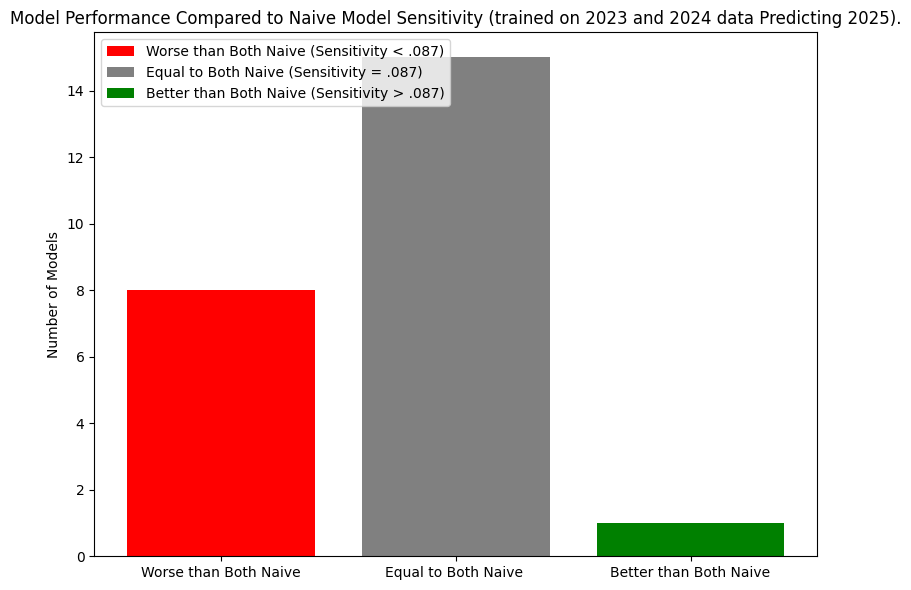

In [33]:
import matplotlib.pyplot as plt

def plot_performance_comparison2325(worse_than_naive, equal_to_best_naive, better_than_both_naive):
    """
    Creates a bar plot comparing model performance based on different categories.

    Parameters:
    - worse_than_naive: Models that performed worse than the naive.
    - equal_to_best_naive: Models that performed equal to the best performing naive.
    - better_than_both_naive: Models that performed better than both naive hypotheses.
    """
    # Bar labels for the three categories for the legend
    categories = ['Worse than Both Naive (Sensitivity < .087)',
                  'Equal to Both Naive (Sensitivity = .087)',
                  'Better than Both Naive (Sensitivity > .087)']

    horizontalLabels = ['Worse than Both Naive',
                  'Equal to Both Naive ',
                  'Better than Both Naive']

    # Values for each bar
    values = [worse_than_naive, equal_to_best_naive, better_than_both_naive]

    # Color map for each category
    colors = ['red', 'grey', 'green']

    # Create a bar plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot bars for each category
    bars = ax.bar(horizontalLabels, values, color=colors)

    # Add labels, title, and legend
    ax.set_ylabel('Number of Models')
    ax.set_title('Model Performance Compared to Naive Model Sensitivity (trained on 2023 and 2024 data Predicting 2025).')

    # Custom legend with colors corresponding to the bars
    ax.legend(bars, categories, loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
plot_performance_comparison2325(8, 15, 1)


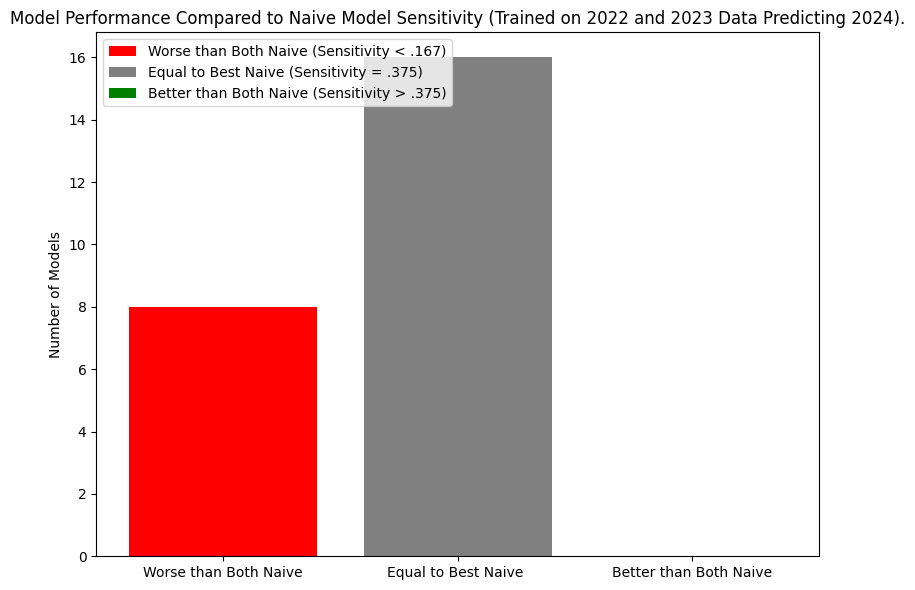

In [32]:
import matplotlib.pyplot as plt

def plot_performance_comparison24(worse_than_naive, equal_to_best_naive, better_than_both_naive):
    """
    Creates a bar plot comparing model performance based on different categories.

    Parameters:
    - worse_than_naive: Models that performed worse than the naive.
    - equal_to_best_naive: Models that performed equal to the best performing naive.
    - better_than_both_naive: Models that performed better than both naive hypotheses.
    """
    # Bar labels for the three categories for the legend
    categories = ['Worse than Both Naive (Sensitivity < .167)',
                  'Equal to Best Naive (Sensitivity = .375)',
                  'Better than Both Naive (Sensitivity > .375)']

    horizontalLabels = ['Worse than Both Naive',
                  'Equal to Best Naive ',
                  'Better than Both Naive']

    # Values for each bar
    values = [worse_than_naive, equal_to_best_naive, better_than_both_naive]

    # Color map for each category
    colors = ['red', 'grey', 'green']

    # Create a bar plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot bars for each category
    bars = ax.bar(horizontalLabels, values, color=colors)

    # Add labels, title, and legend
    ax.set_ylabel('Number of Models')
    ax.set_title('Model Performance Compared to Naive Model Sensitivity (Trained on 2022 and 2023 Data Predicting 2024).')

    # Custom legend with colors corresponding to the bars
    ax.legend(bars, categories, loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
plot_performance_comparison24(8, 16, 0)


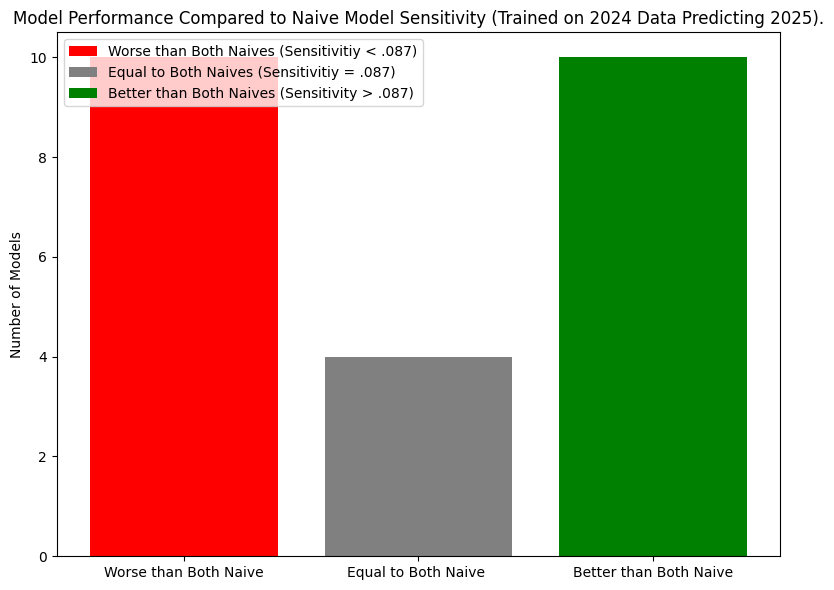

In [34]:
import matplotlib.pyplot as plt

def plot_performance_comparison2425(worse_than_naive, equal_to_best_naive, better_than_both_naive):
    """
    Creates a bar plot comparing model performance based on different categories.

    Parameters:
    - worse_than_naive: Models that performed worse than the naive.
    - equal_to_best_naive: Models that performed equal to the best performing naive.
    - better_than_both_naive: Models that performed better than both naive hypotheses.
    """
    # Bar labels for the three categories for the legend
    categories = ['Worse than Both Naives (Sensitivitiy < .087)',
                  'Equal to Both Naives (Sensitivitiy = .087)',
                  'Better than Both Naives (Sensitivity > .087)']

    horizontalLabels = ['Worse than Both Naive',
                  'Equal to Both Naive ',
                  'Better than Both Naive']

    # Values for each bar
    values = [worse_than_naive, equal_to_best_naive, better_than_both_naive]

    # Color map for each category
    colors = ['red', 'grey', 'green']

    # Create a bar plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot bars for each category
    bars = ax.bar(horizontalLabels, values, color=colors)

    # Add labels, title, and legend
    ax.set_ylabel('Number of Models')
    ax.set_title('Model Performance Compared to Naive Model Sensitivity (Trained on 2024 Data Predicting 2025).')

    # Custom legend with colors corresponding to the bars
    ax.legend(bars, categories, loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
plot_performance_comparison2425(10, 4, 10)


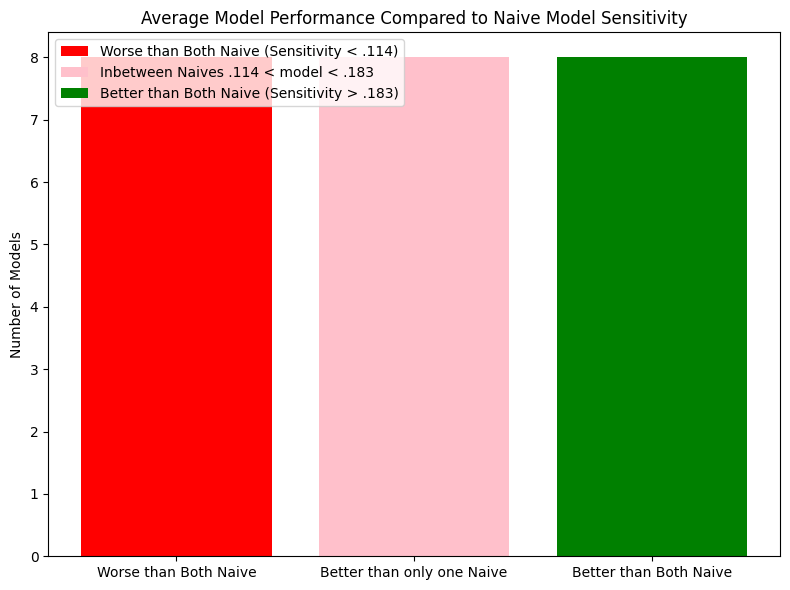

In [35]:
import matplotlib.pyplot as plt

def plot_performance_comparisonAv(worse_than_naive, inbetweenNaive, better_than_both_naive):
    """
    Creates a bar plot comparing model performance based on different categories.

    Parameters:
    - worse_than_naive: Models that performed worse than the naive.
    - equal_to_best_naive: Models that performed equal to the best performing naive.
    - better_than_both_naive: Models that performed better than both naive hypotheses.
    """
    # Bar labels for the three categories for the legend
    categories = ['Worse than Both Naive (Sensitivity < .114)',
                  'Inbetween Naives .114 < model < .183',
                  'Better than Both Naive (Sensitivity > .183)']

    horizontalLabels = ['Worse than Both Naive',
                        'Better than only one Naive',
                  'Better than Both Naive']

    # Values for each bar
    values = [worse_than_naive, inbetweenNaive,  better_than_both_naive]

    # Color map for each category
    colors = ['red', 'pink',  'green']

    # Create a bar plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot bars for each category
    bars = ax.bar(horizontalLabels, values, color=colors)

    # Add labels, title, and legend
    ax.set_ylabel('Number of Models')
    ax.set_title('Average Model Performance Compared to Naive Model Sensitivity')

    # Custom legend with colors corresponding to the bars
    ax.legend(bars, categories, loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
plot_performance_comparisonAv(8, 8, 8)
